In [1]:
# fit() ---- transform() ---- fit_transform() ---- predict() aralarındaki farklılık ve benzerlikler



# BURADA EĞİTİM SETİ fit_transform() 'a tabi tutuldu!
# TEST SETİ transform'a tabi tutuldu!

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
dosya= pd.read_excel("Oz_Dok_Tez_Verileri_15.12.xlsx")
data=dosya.copy()
data.head()

Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  \
0                    Diyafram duvar                46.7       1280000   
1  Diyafram duvar + Çok sıra destek                27.5       1280000   
2             Kesişen kazıklı duvar                60.0       2717000   
3  Diyafram duvar + Çok sıra destek                33.0        540000   
4         Kesişen + Tek sıra destek                85.0       1254800   

   H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
0       14000          34.0          60.0  
1       11000          20.0          35.0  
2       18000          28.0          34.0  
3       10000          10.0          13.0  
4        9700           0.0           3.0

In [4]:
data.tail()

Destekleme_Sistemi  Destek_Aralıgı(mm)  \
121  Yukarıdan aşağıya çok sıra destekli duvar                34.0   
122  Yukarıdan aşağıya çok sıra destekli duvar                34.0   
123  Yukarıdan aşağıya çok sıra destekli duvar                49.0   
124  Yukarıdan aşağıya çok sıra destekli duvar                49.0   
125  Yukarıdan aşağıya çok sıra destekli duvar                53.0   

     EI\n(kNm2/m)  H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
121       4600000       13600           2.0           NaN  
122       4600000       13600           5.0           NaN  
123       4600000       27000          30.0          64.0  
124       4600000       27000          24.0          79.0  
125       2700000       16000          10.0          30.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Destekleme_Sistemi  126 non-null    object 
 1   Destek_Aralıgı(mm)  126 non-null    float64
 2   EI
(kNm2/m)         126 non-null    int64  
 3   H_Kazı(mm)          126 non-null    int64  
 4   δv_Olcum(mm)        125 non-null    float64
 5   δh_Olcum(mm)        122 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.0+ KB


In [6]:
data.isnull().sum().sort_values()

Destekleme_Sistemi    0
Destek_Aralıgı(mm)    0
EI\n(kNm2/m)          0
H_Kazı(mm)            0
δv_Olcum(mm)          1
δh_Olcum(mm)          4
dtype: int64

In [4]:
data.describe().T

count          mean           std     min        25%  \
Destek_Aralıgı(mm)  126.0  4.304683e+01  2.111839e+01     7.5     33.075   
EI\n(kNm2/m)        126.0  1.435550e+06  1.639789e+06  2581.0  73575.000   
H_Kazı(mm)          126.0  1.488730e+04  5.982090e+03  4000.0  10775.000   
δv_Olcum(mm)        125.0  3.534960e+01  4.797575e+01     0.0     10.000   
δh_Olcum(mm)        122.0  3.956148e+01  4.228506e+01     3.0     15.000   

                         50%          75%        max  
Destek_Aralıgı(mm)      40.0       46.925      161.0  
EI\n(kNm2/m)        726845.0  2500000.000  5400000.0  
H_Kazı(mm)           13950.0    18300.000    37000.0  
δv_Olcum(mm)            20.0       35.000      270.0  
δh_Olcum(mm)            25.4       48.000      280.0

In [5]:
data.shape

(126, 6)

In [6]:
data.columns

Index(['Destekleme_Sistemi', 'Destek_Aralıgı(mm)', 'EI\n(kNm2/m)',
       'H_Kazı(mm)', 'δv_Olcum(mm)', 'δh_Olcum(mm)'],
      dtype='object')

In [7]:
data.dropna(axis=0, how='any', inplace= True)

In [11]:
data.groupby(data["Destekleme_Sistemi"]).agg(["count", "mean", "std", "min", "max"])

Destek_Aralıgı(mm)              \
                                                       count        mean   
Destekleme_Sistemi                                                         
Aşağıdan yukarıya + Geçici destek                          1   90.000000   
Diyafram duvar                                             1   46.700000   
Diyafram duvar + Çok sıra destek                           2   30.250000   
Kesişen + Tek sıra destek                                  1   85.000000   
Kesişen kazıklı duvar                                      4   72.400000   
Perde Duvar + Tek sıra destek                              1   60.000000   
Perde Duvar + Çok sıra destek                              2   54.300000   
Perde H Profil + Çok sıra destek                           9   40.000000   
Sürekli kazıklı duvar                                      1   72.800000   
Tek sıra destekli palplanş perde duvar                     1   68.000000   
Tek sıra destekli perde duvar                              1   50.000000   
Tek sıra destekli çakma profil                             1   50.000000   
Yukarıdan aşağıya + Kazıklı duvar                          3   69.666667   
Yukarıdan aşağıya ankrajlı duvar                           1   46.000000   
Yukarıdan aşağıya diyafram duvar                          10   34.140000   
Yukarıdan aşağıya perde duvar                              1   30.000000   
Yukarıdan aşağıya çakma profil                             2   42.500000   
Yukarıdan aşağıya çok sıra destekli duvar                 11   48.727273   
Çakma kazıklı duvar                                        1  161.000000   
Çakma profil + Tek sıra destek                             1   50.000000   
Çok sıra ankrajlı diyafram duvar                           8   47.737500   
Çok sıra ankrajlı kazıklı duvar                            4   22.125000   
Çok sıra ankrajlı çakma profil                             8   35.250000   
Çok sıra destek - 'Arbed'                                  1   40.000000   
Çok sıra destekli diyafram duvar                          11   37.563636   
Çok sıra destekli kazıklı duvar                            2   47.500000   
Çok sıra destekli kesişen kazık                            2   65.000000   
Çok sıra destekli palplanş perde                           3   22.000000   
Çok sıra destekli perde duvar                             13   32.361538   
Çok sıra destekli sürekli kazıklı duvar                    8   38.000000   
Çok sıra destekli çakma profil                             6   40.000000   

                                                                    \
                                                 std    min    max   
Destekleme_Sistemi                                                   
Aşağıdan yukarıya + Geçici destek                NaN   90.0   90.0   
Diyafram duvar                                   NaN   46.7   46.7   
Diyafram duvar + Çok sıra destek            3.889087   27.5   33.0   
Kesişen + Tek sıra destek                        NaN   85.0   85.0   
Kesişen kazıklı duvar                      20.243847   56.0  100.8   
Perde Duvar + Tek sıra destek                    NaN   60.0   60.0   
Perde Duvar + Çok sıra destek              29.274221   33.6   75.0   
Perde H Profil + Çok sıra destek            0.000000   40.0   40.0   
Sürekli kazıklı duvar                            NaN   72.8   72.8   
Tek sıra destekli palplanş perde duvar           NaN   68.0   68.0   
Tek sıra destekli perde duvar                    NaN   50.0   50.0   
Tek sıra destekli çakma profil                   NaN   50.0   50.0   
Yukarıdan aşağıya + Kazıklı duvar          19.502137   50.0   89.0   
Yukarıdan aşağıya ankrajlı duvar                 NaN   46.0   46.0   
Yukarıdan aşağıya diyafram duvar            3.779830   27.8   40.0   
Yukarıdan aşağıya perde duvar                    NaN   30.0   30.0   
Yukarıdan aşağıya çakma profil              6.363961   38.0   47.0   
Yukarıdan aşağıya çok sıra destekli duvar   7.734221   41

In [12]:
d_grup= data.groupby(by=data["Destekleme_Sistemi"])
d_grup

In [13]:
type(d_grup)

pandas.core.groupby.generic.DataFrameGroupBy

In [14]:
data.columns

Index(['Destekleme_Sistemi', 'Destek_Aralıgı(mm)', 'EI\n(kNm2/m)',
       'H_Kazı(mm)', 'δv_Olcum(mm)', 'δh_Olcum(mm)'],
      dtype='object')

In [15]:
"""d
f = pd.DataFrame({'H_Kazı': data["H_Kazı(mm)"].values,'Düşey_Deplasman': data["δv_Olcum(mm)"].values, 'Yanal_Rijitlik': data["EI\n(kNm2/m)"].values, 'Destek_Aralıgı(mm)': data["Destek_Aralıgı(mm)"].values },
                  index=data["Destekleme_Sistemi"])
plot = df.plot.pie(y='H_Kazı', figsize=(25, 8))
"""

'd\nf = pd.DataFrame({\'H_Kazı\': data["H_Kazı(mm)"].values,\'Düşey_Deplasman\': data["δv_Olcum(mm)"].values, \'Yanal_Rijitlik\': data["EI\n(kNm2/m)"].values, \'Destek_Aralıgı(mm)\': data["Destek_Aralıgı(mm)"].values },\n                  index=data["Destekleme_Sistemi"])\nplot = df.plot.pie(y=\'H_Kazı\', figsize=(25, 8))\n'

In [16]:
yeni = data.iloc[:,3:6]
yeni.head()

H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)
0       14000          34.0          60.0
1       11000          20.0          35.0
2       18000          28.0          34.0
3       10000          10.0          13.0
4        9700           0.0           3.0

In [17]:
"""
plot = yeni.plot.pie(subplots=True, figsize=(30, 30))
"""


'\nplot = yeni.plot.pie(subplots=True, figsize=(30, 30))\n'

In [18]:
"""
plt.pie(x="Destekleme_Sistemi",labels= "Destek_Aralıgı(mm)", autopct='%.0f%%');
plt.show()
"""

'\nplt.pie(x="Destekleme_Sistemi",labels= "Destek_Aralıgı(mm)", autopct=\'%.0f%%\');\nplt.show()\n'

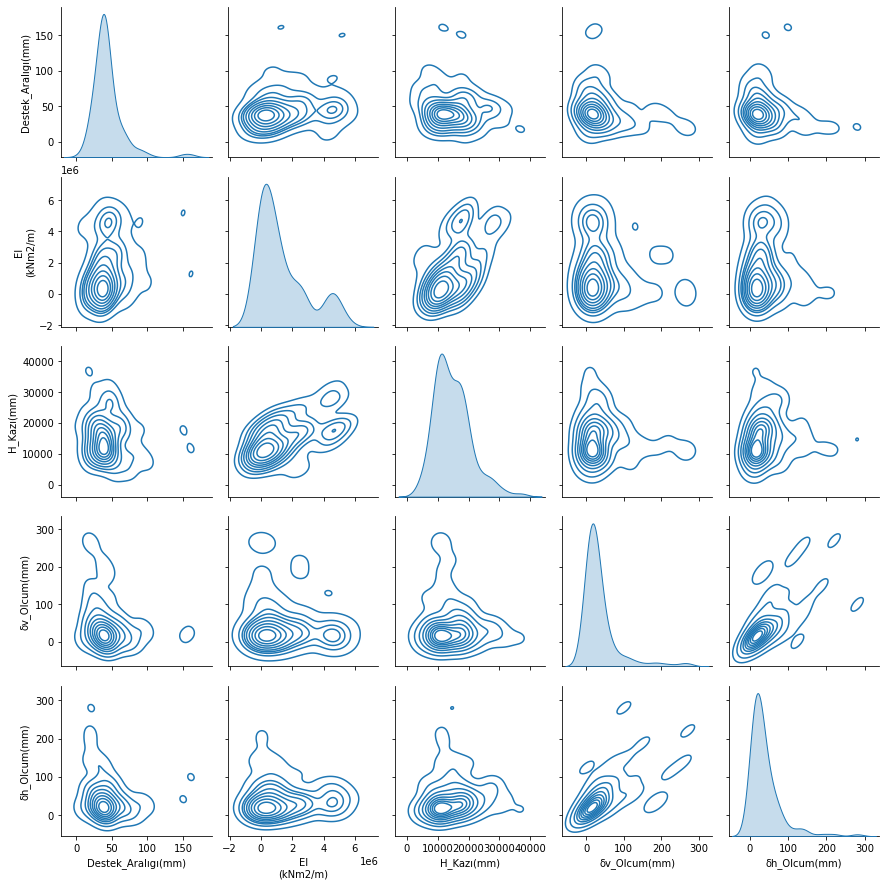

In [19]:
sns.pairplot(data, kind="kde"); # kde', 'hist', 'reg

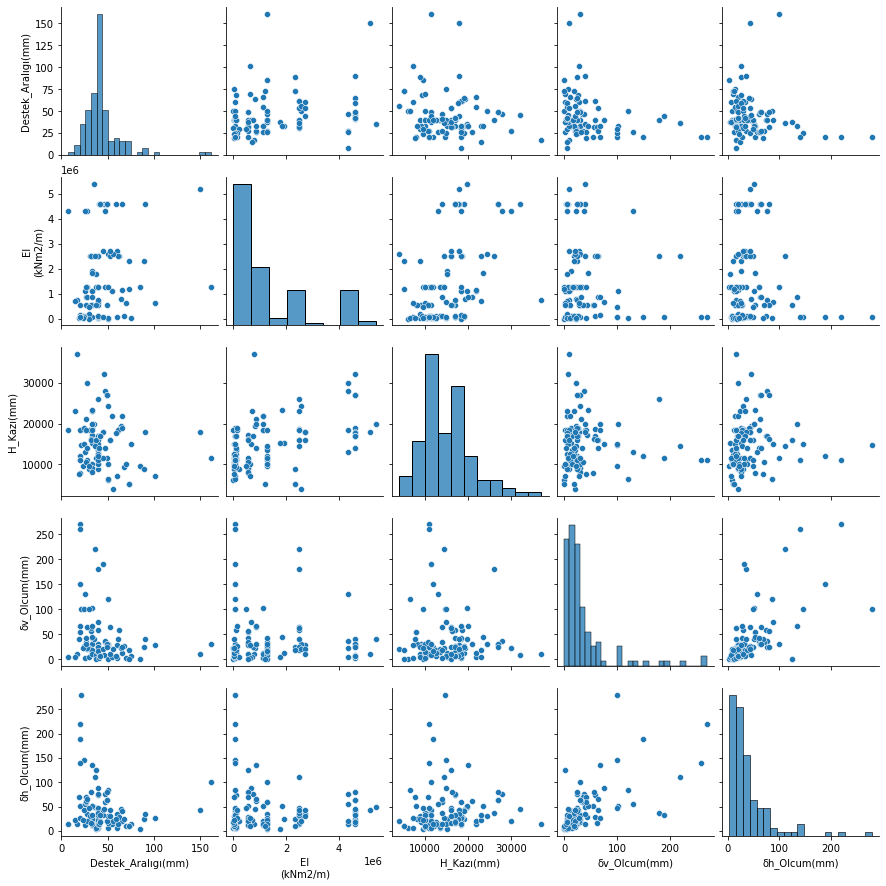

In [20]:
sns.pairplot(data, kind= "scatter");

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distrib

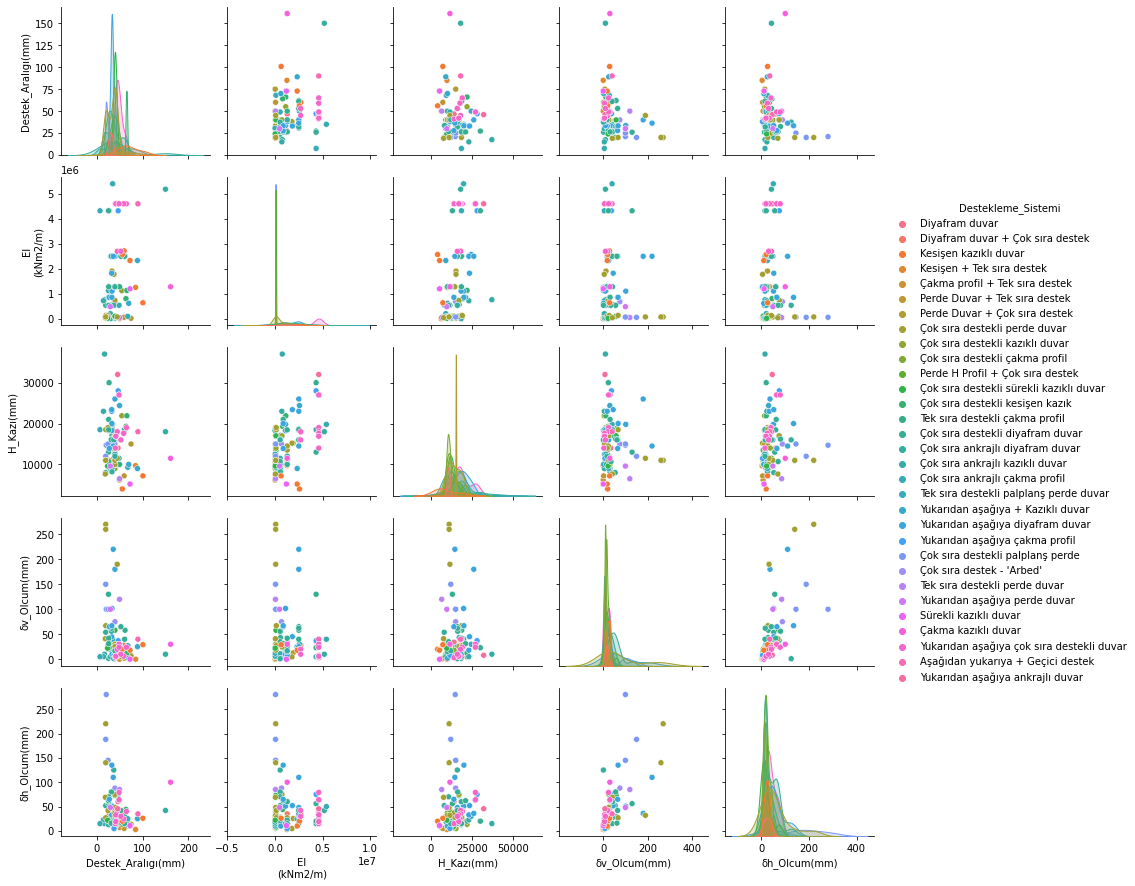

In [21]:
sns.pairplot(data, kind= "scatter", hue="Destekleme_Sistemi");

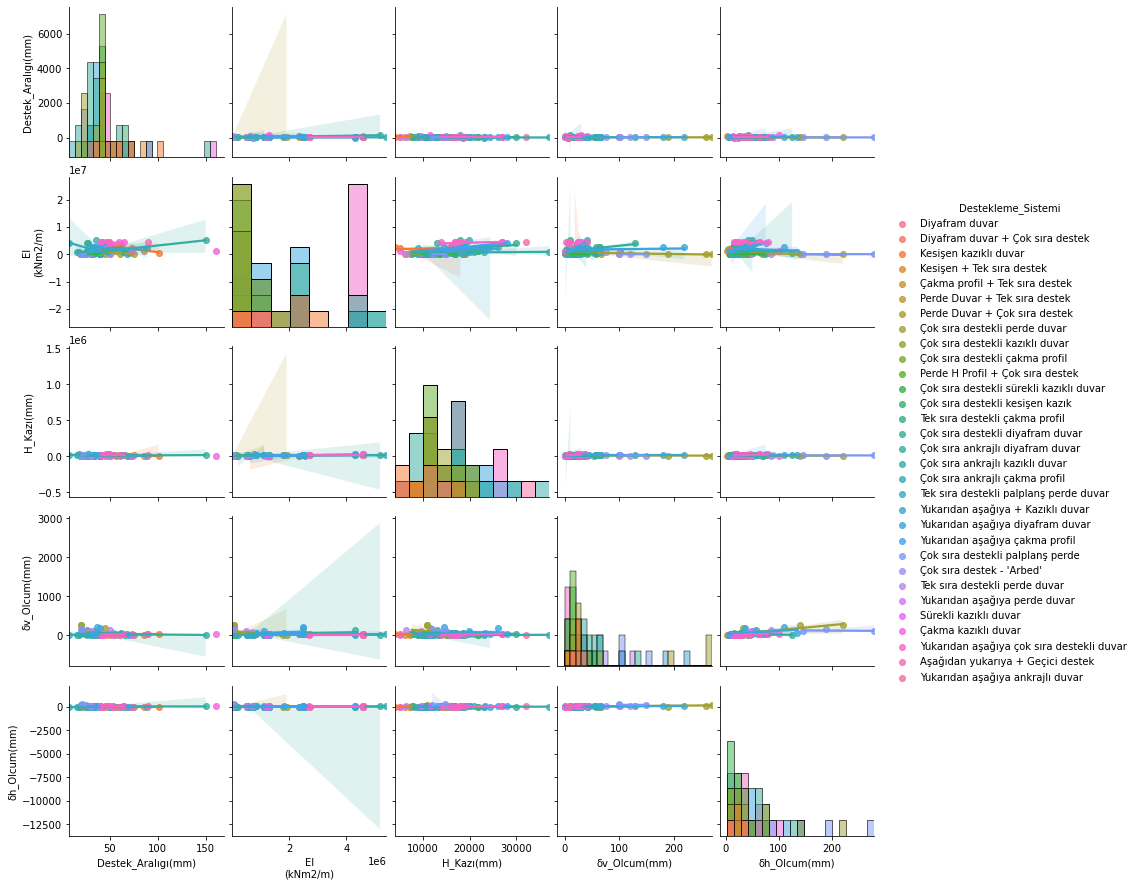

In [22]:
sns.pairplot(data, kind= "reg", diag_kind='hist',  hue="Destekleme_Sistemi"); # 'scatter', 'kde', 'hist', 'reg'  / # 'auto', 'hist', 'kde', Non

In [23]:
sns.set(rc={"figure.figsize": (20,8)})

In [24]:
data.columns

Index(['Destekleme_Sistemi', 'Destek_Aralıgı(mm)', 'EI\n(kNm2/m)',
       'H_Kazı(mm)', 'δv_Olcum(mm)', 'δh_Olcum(mm)'],
      dtype='object')

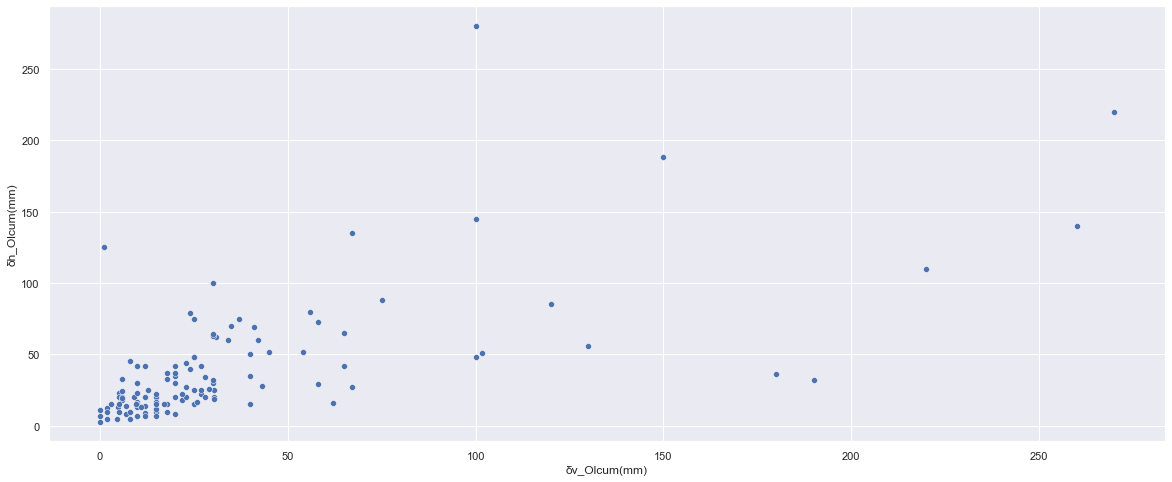

In [25]:
sns.scatterplot(data=data, x="δv_Olcum(mm)", y="δh_Olcum(mm)");

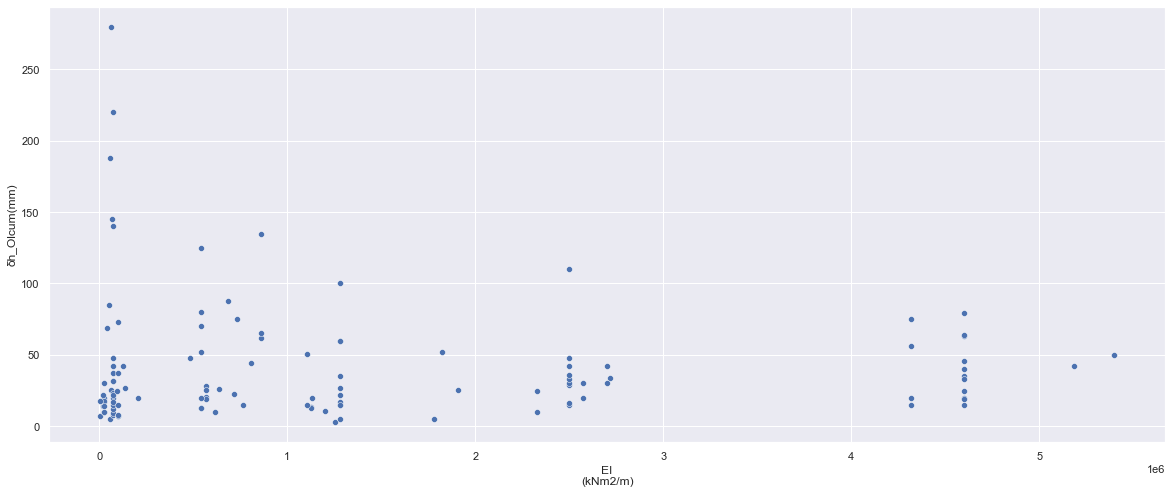

In [26]:
sns.scatterplot(data=data, x="EI\n(kNm2/m)", y="δh_Olcum(mm)");

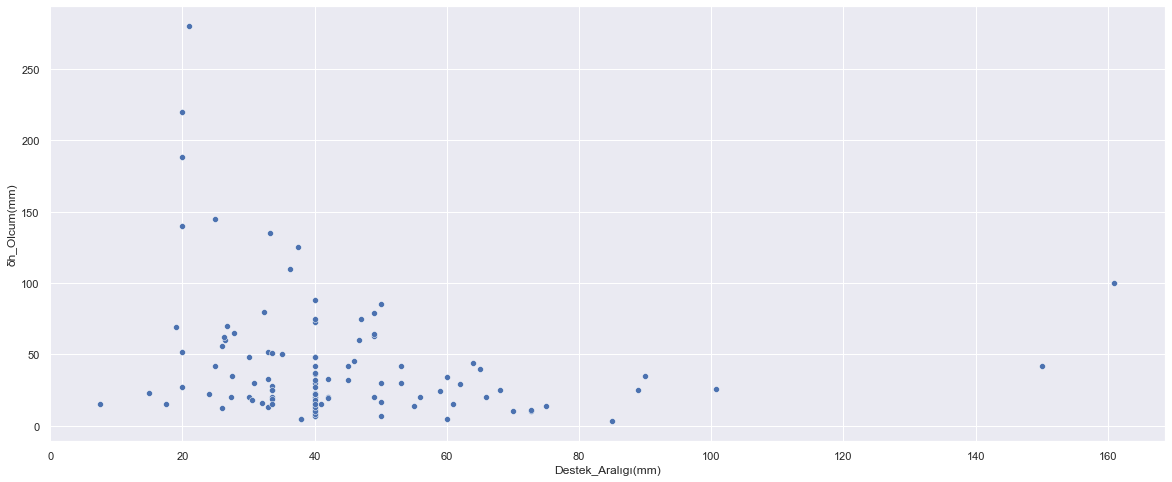

In [27]:
sns.scatterplot(data=data, x="Destek_Aralıgı(mm)", y="δh_Olcum(mm)");

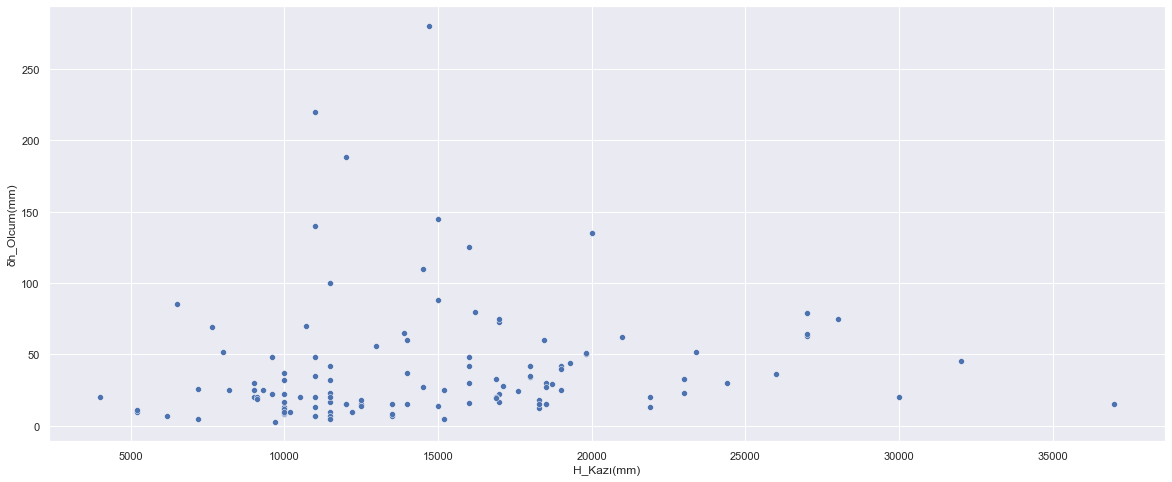

In [28]:
sns.scatterplot(data=data, x="H_Kazı(mm)", y="δh_Olcum(mm)");

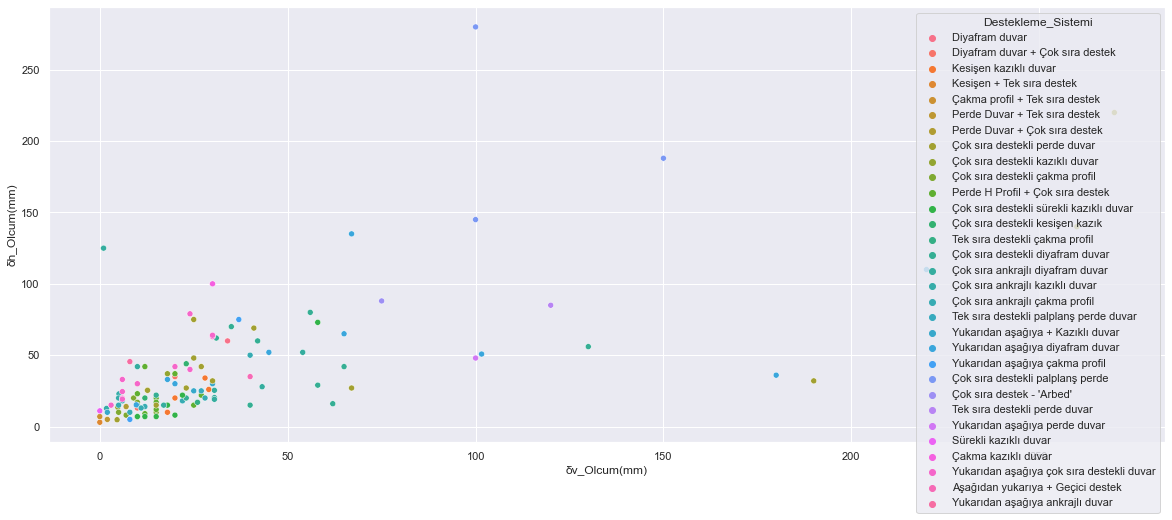

In [29]:
sns.scatterplot(data=data,  x="δv_Olcum(mm)", y="δh_Olcum(mm)", hue="Destekleme_Sistemi");

In [30]:
data.iloc[:,1:]

Destek_Aralıgı(mm)  EI\n(kNm2/m)  H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)
0                  46.7       1280000       14000          34.0          60.0
1                  27.5       1280000       11000          20.0          35.0
2                  60.0       2717000       18000          28.0          34.0
3                  33.0        540000       10000          10.0          13.0
4                  85.0       1254800        9700           0.0           3.0
..                  ...           ...         ...           ...           ...
119                42.0       4600000       16900           6.0          19.9
120                42.0       4600000       16900           6.0          19.2
123                49.0       4600000       27000          30.0          64.0
124                49.0       4600000       27000          24.0          79.0
125                53.0       2700000       16000          10.0          30.0

[121 rows x 5 columns]

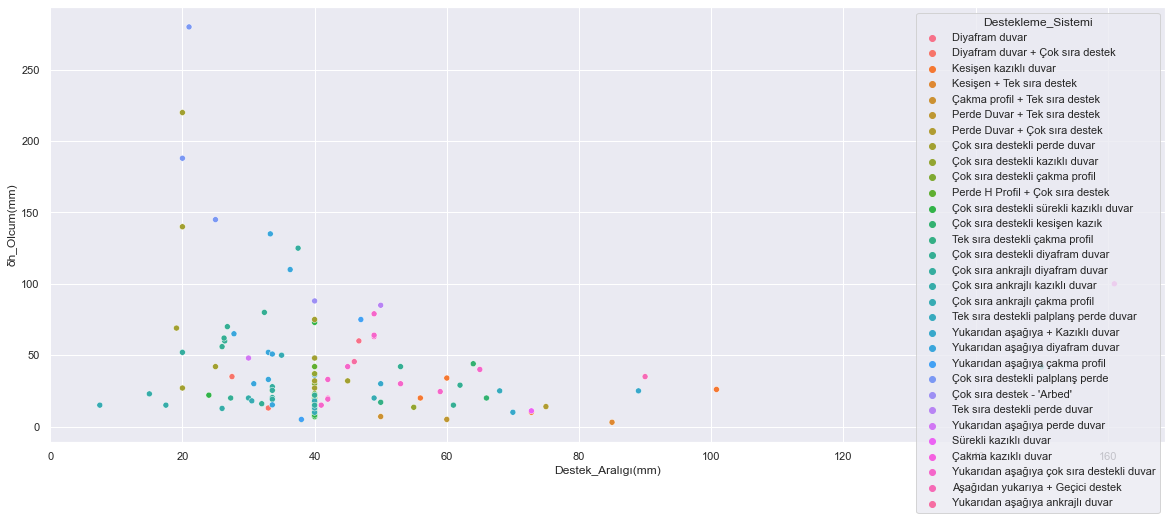

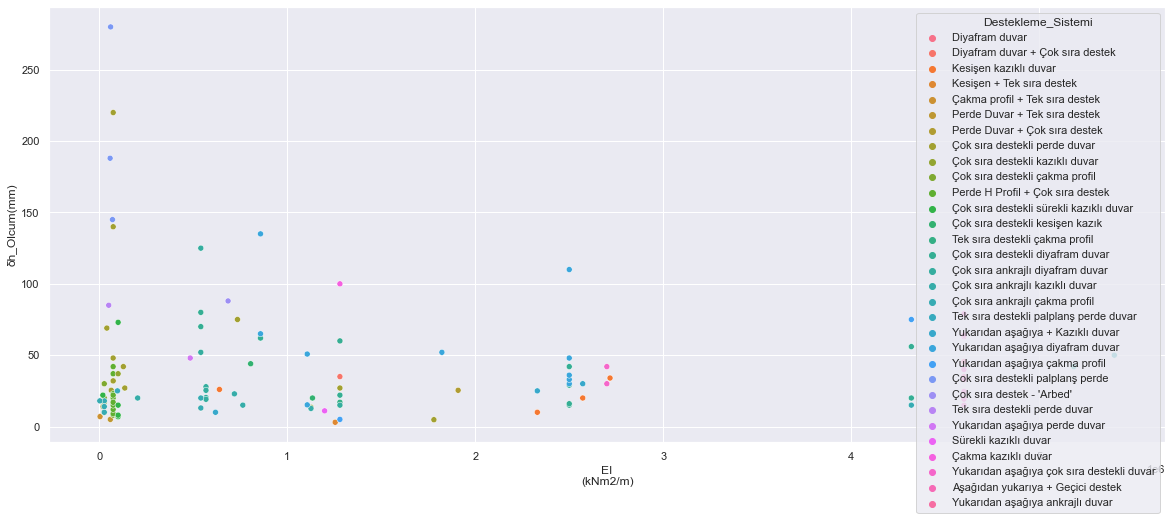

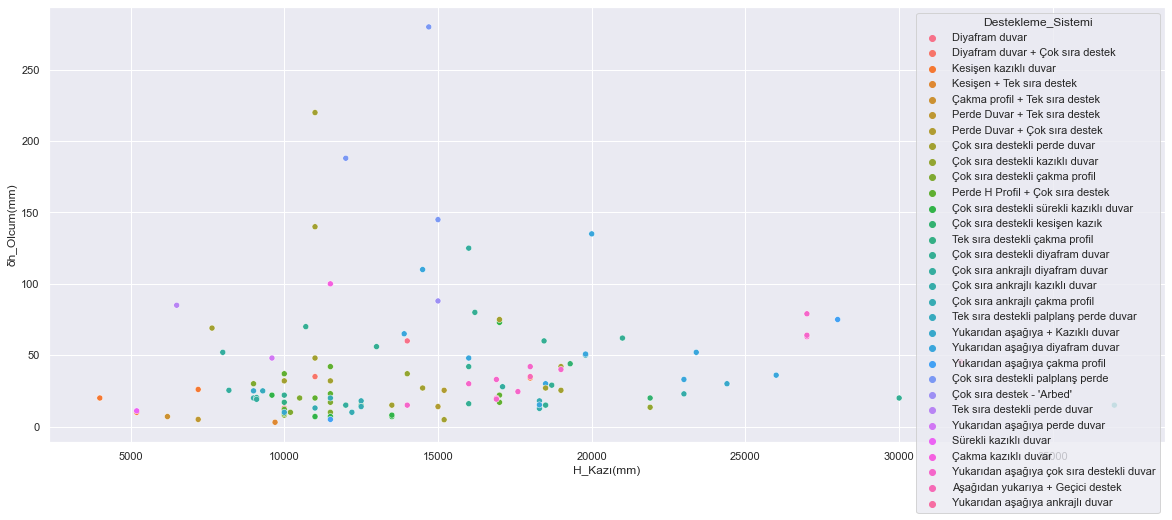

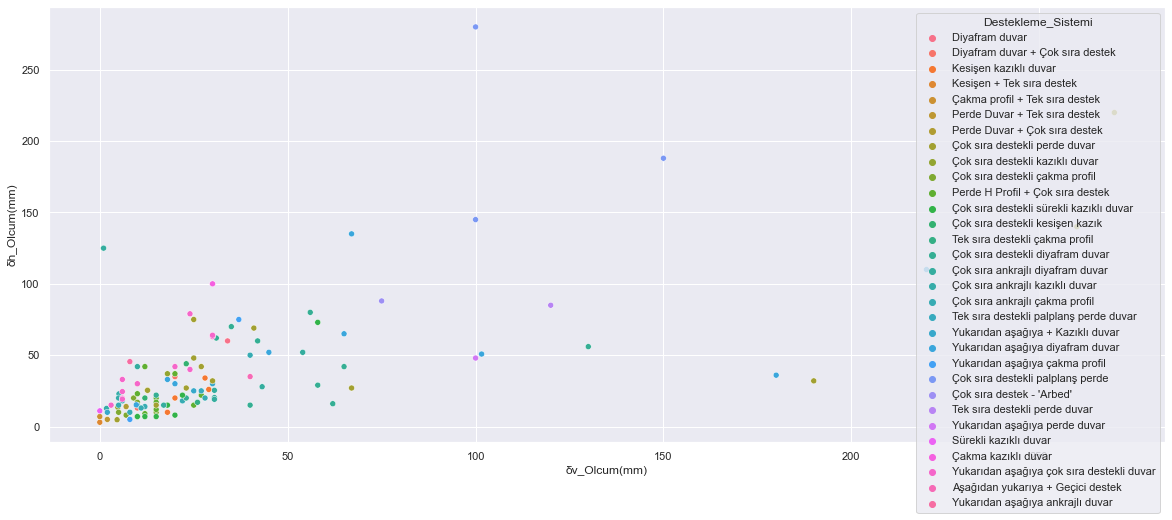

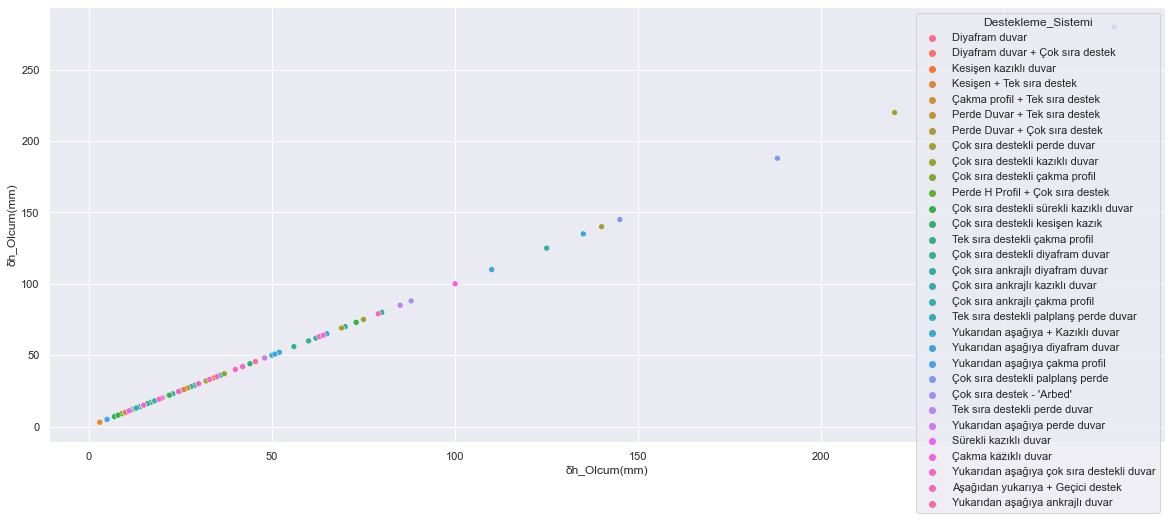

In [31]:
for column in data.iloc[:,1:]:
    sns.scatterplot(data=data, x=column , y="δh_Olcum(mm)", hue="Destekleme_Sistemi");
    plt.show()

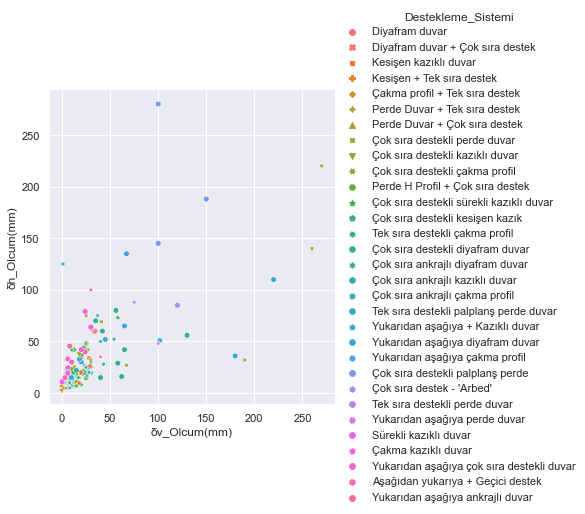

In [32]:
sns.set_theme()

sns.relplot(data=data,x="δv_Olcum(mm)", y="δh_Olcum(mm)", hue="Destekleme_Sistemi", style="Destekleme_Sistemi");

In [33]:
data.columns

Index(['Destekleme_Sistemi', 'Destek_Aralıgı(mm)', 'EI\n(kNm2/m)',
       'H_Kazı(mm)', 'δv_Olcum(mm)', 'δh_Olcum(mm)'],
      dtype='object')

In [34]:
"""
for column in data.iloc[:,1:]:
    sns.lmplot(data=data, x="column", y="δh_Olcum(mm)");  # hue="Destekleme_Sistemi"
    #plt.figure(figsize=(14,8)
    #plt.axhline(10, color="red", lw=5, alpha=0.7)  # axhline ile eşik çizebiliyorum! 
    plt.show()
"""

'\nfor column in data.iloc[:,1:]:\n    sns.lmplot(data=data, x="column", y="δh_Olcum(mm)");  # hue="Destekleme_Sistemi"\n    #plt.figure(figsize=(14,8)\n    #plt.axhline(10, color="red", lw=5, alpha=0.7)  # axhline ile eşik çizebiliyorum! \n    plt.show()\n'

In [35]:
data.columns

Index(['Destekleme_Sistemi', 'Destek_Aralıgı(mm)', 'EI\n(kNm2/m)',
       'H_Kazı(mm)', 'δv_Olcum(mm)', 'δh_Olcum(mm)'],
      dtype='object')

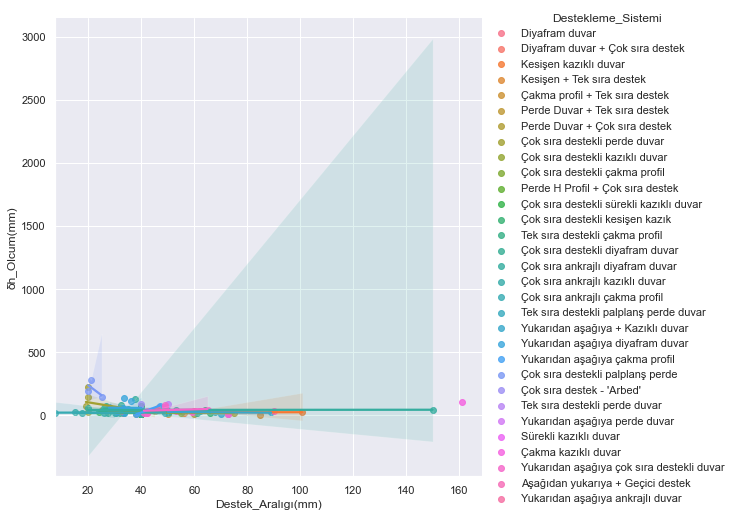

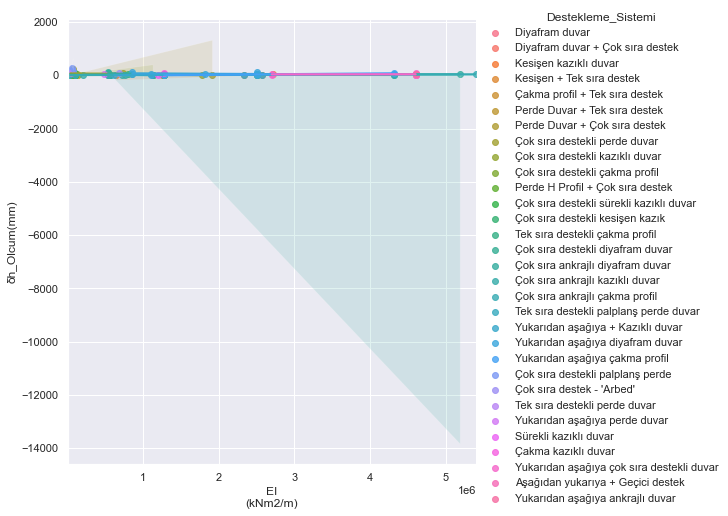

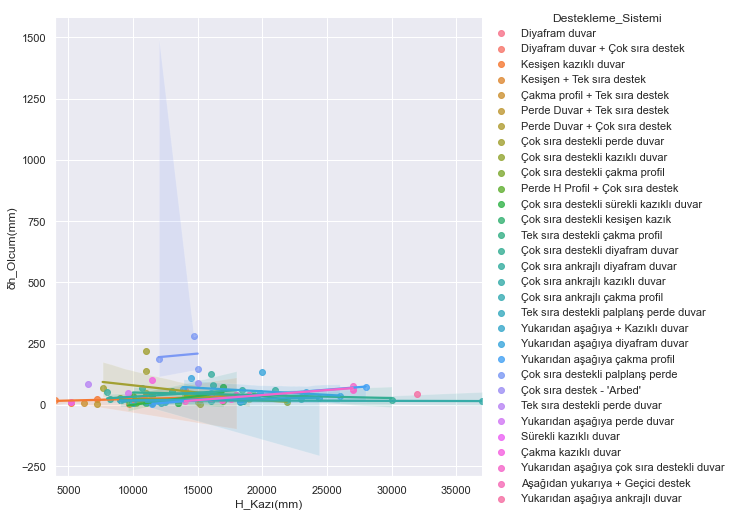

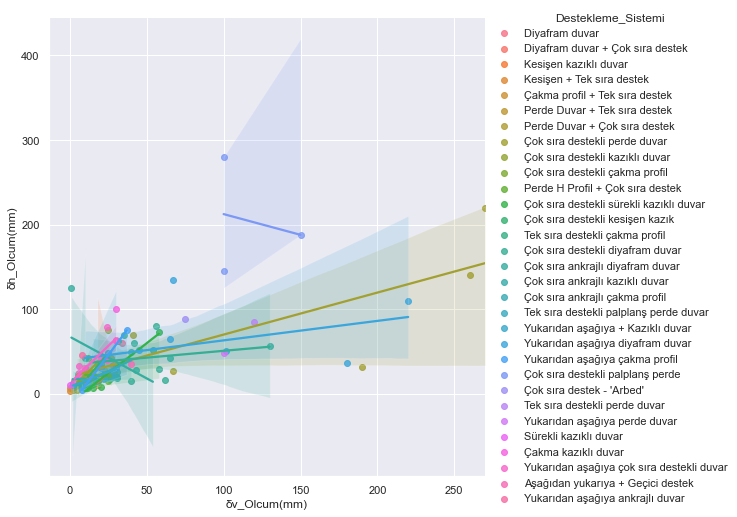

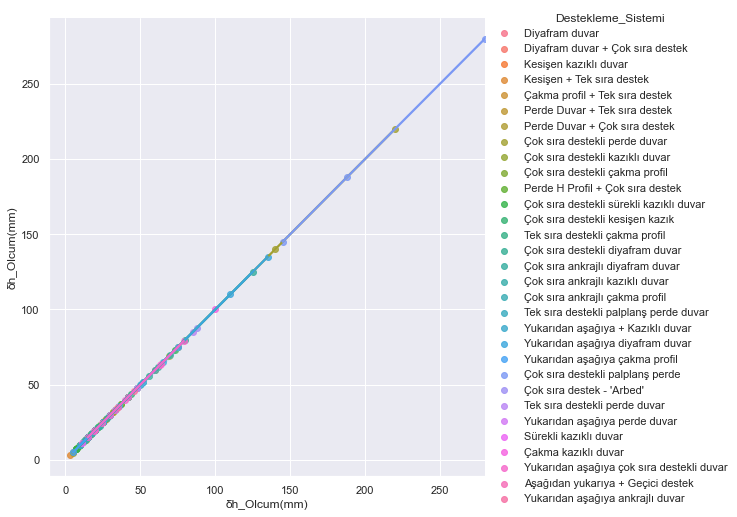

In [36]:
for column in data.iloc[:,1:]:
    sns.lmplot(data=data, x=column, y="δh_Olcum(mm)",  hue="Destekleme_Sistemi",height=7 );
    #plt.figure(figsize=(14,8)
    #plt.axhline(10, color="red", lw=5, alpha=0.7)  # axhline ile eşik çizebiliyorum! 
    plt.show()

In [37]:
data[data["Destekleme_Sistemi"] == "Çok sıra destekli palplanş perde"]

Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  \
70  Çok sıra destekli palplanş perde                21.0         60000   
87  Çok sıra destekli palplanş perde                20.0         57400   
88  Çok sıra destekli palplanş perde                25.0         70000   

    H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
70       14700         100.0         280.0  
87       12000         150.0         188.0  
88       15000         100.0         145.0

In [38]:
for column in data["Destekleme_Sistemi"]:
    data[data["Destekleme_Sistemi"] == column]
    print(data[data["Destekleme_Sistemi"] == column], end="\n" )

  Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  H_Kazı(mm)  \
0     Diyafram duvar                46.7       1280000       14000   

   δv_Olcum(mm)  δh_Olcum(mm)  
0          34.0          60.0  
                 Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  \
1  Diyafram duvar + Çok sıra destek                27.5       1280000   
3  Diyafram duvar + Çok sıra destek                33.0        540000   

   H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
1       11000          20.0          35.0  
3       10000          10.0          13.0  
        Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  H_Kazı(mm)  \
2    Kesişen kazıklı duvar                60.0       2717000       18000   
104  Kesişen kazıklı duvar                56.0       2571750        4000   
105  Kesişen kazıklı duvar                72.8       2330250        5200   
108  Kesişen kazıklı duvar               100.8        639000        7200   

     δv_Olcum(mm)  δh_Olcum(mm)  
2            28.0          3

In [39]:
# diyafram_index= data[data["Destek_Tipi"] == "DIYAFRAM"].index
# diyafram_index

In [40]:
# data.drop(index=diyafram_index, inplace= True)
# data.tail(10)

In [41]:
# data.index= np.arange(0,65)

In [42]:
# data.tail(10)

In [43]:
data.corr()

Destek_Aralıgı(mm)  EI\n(kNm2/m)  H_Kazı(mm)  \
Destek_Aralıgı(mm)            1.000000      0.246145   -0.109769   
EI\n(kNm2/m)                  0.246145      1.000000    0.511709   
H_Kazı(mm)                   -0.109769      0.511709    1.000000   
δv_Olcum(mm)                 -0.208538     -0.062677   -0.011488   
δh_Olcum(mm)                 -0.150895     -0.031769    0.095316   

                    δv_Olcum(mm)  δh_Olcum(mm)  
Destek_Aralıgı(mm)     -0.208538     -0.150895  
EI\n(kNm2/m)           -0.062677     -0.031769  
H_Kazı(mm)             -0.011488      0.095316  
δv_Olcum(mm)            1.000000      0.647046  
δh_Olcum(mm)            0.647046      1.000000

In [44]:
data.columns


Index(['Destekleme_Sistemi', 'Destek_Aralıgı(mm)', 'EI\n(kNm2/m)',
       'H_Kazı(mm)', 'δv_Olcum(mm)', 'δh_Olcum(mm)'],
      dtype='object')

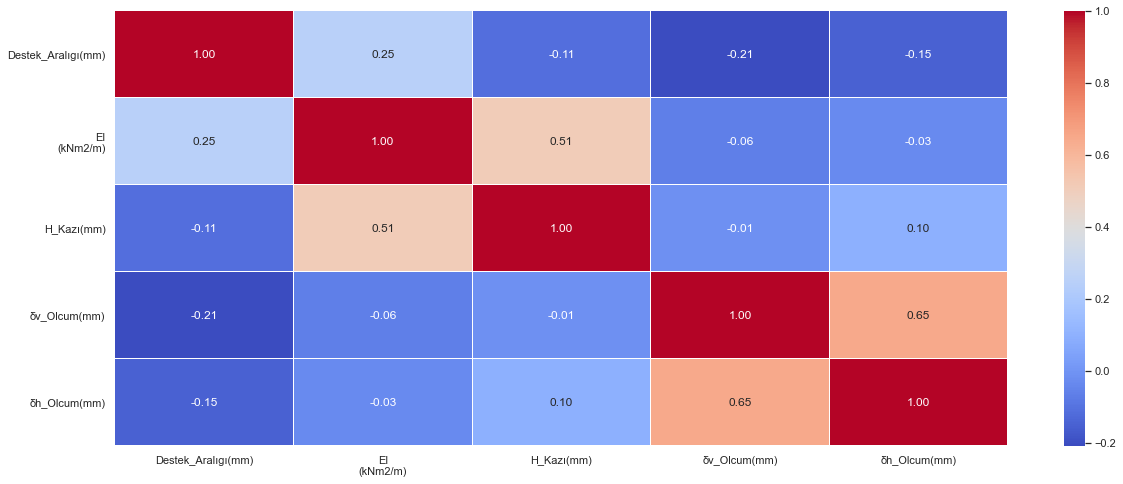

In [45]:
sns.heatmap(data= data.corr(),annot=True, fmt= ".2f", cmap= "coolwarm", linewidths= 0.01);

## Korelasyon Anlamlılığı Testi

In [46]:
from scipy.stats import stats, shapiro, pearsonr, spearmanr
# pearsonr  : Parametrik  p < 0.05
# spearmanr : Non-Parametrik  p > 0.05


In [47]:
#H0 hipotezi: "örnek dağılım ile teorik dağılım arasında anlamlı fark yoktur" der.
#H0 hipotezi shapiro'da pvalue <0.05 ise red edilir. Red ise fark vardır deriz. Non-parametrik olur.

#Burada normallik varsayımı kontrolü yapıyoruz. İki değişken için.
##Varsayım okey ise Pearsonr Korelasyon ktsyları. _PARAMETRİK_
##Varsayım out ise Spearmanr Korelasyon Ktsyları kullanılır. _NON_PARAMETRİK_

##p<0.05 ise Değişkenler arasında anlamlı ilişki yoktur diyen H0 hipotezi RED edilir.
## Değişkenler arası anlamlı ilişki vardır! orta-yüksek vs pozitif -negatif vs ilişkilidir. DERİZ.




In [48]:
# LOOP

In [49]:

for column in data.iloc[:,1:]:
    test_istatistigi_1 , pvalue_1 = shapiro(data[column])
    print(data[column].name, "Test istatistigi_1 = %.4f , pvalue_1 = %.4f" % (test_istatistigi_1,pvalue_1))
        
    if pvalue_1 < 0.05:
        korelasyon_kts_2, pvalue_2 = stats.spearmanr(data[column], data["δv_Olcum(mm)"])
        print("korelasyon kts_2 = %.4f , pvalue_2 = %.4f" % (korelasyon_kts_2,pvalue_2), "HO: RED Değişkenler arasında anlamlı korelasyon vardır")
            
    else:
        korelasyon_kts_3, pvalue_3 = stats.pearsonr(data[column], data["δh_Olcum(mm)"])
        print("korelasyon kts_3 = %.4f , pvalue_3 = %.4f" % (korelasyon_kts_3,pvalue_3), "HO: RED EDİLMEDİ Değişkenler arasında anlamlı korelasyon yoktur")


Destek_Aralıgı(mm) Test istatistigi_1 = 0.7547 , pvalue_1 = 0.0000
korelasyon kts_2 = -0.2466 , pvalue_2 = 0.0064 HO: RED Değişkenler arasında anlamlı korelasyon vardır
EI
(kNm2/m) Test istatistigi_1 = 0.7894 , pvalue_1 = 0.0000
korelasyon kts_2 = 0.0660 , pvalue_2 = 0.4719 HO: RED Değişkenler arasında anlamlı korelasyon vardır
H_Kazı(mm) Test istatistigi_1 = 0.9387 , pvalue_1 = 0.0000
korelasyon kts_2 = 0.1219 , pvalue_2 = 0.1831 HO: RED Değişkenler arasında anlamlı korelasyon vardır
δv_Olcum(mm) Test istatistigi_1 = 0.6239 , pvalue_1 = 0.0000
korelasyon kts_2 = 1.0000 , pvalue_2 = 0.0000 HO: RED Değişkenler arasında anlamlı korelasyon vardır
δh_Olcum(mm) Test istatistigi_1 = 0.6877 , pvalue_1 = 0.0000
korelasyon kts_2 = 0.6953 , pvalue_2 = 0.0000 HO: RED Değişkenler arasında anlamlı korelasyon vardır


In [50]:
# Aslında korelasyon ktsy'da test_istatistiği'dir.

In [51]:
# Boş Hücre Kaldı mı?

# data.dropna(axis=0, how= "any", inplace= True)

data.isnull().sum()

Destekleme_Sistemi    0
Destek_Aralıgı(mm)    0
EI\n(kNm2/m)          0
H_Kazı(mm)            0
δv_Olcum(mm)          0
δh_Olcum(mm)          0
dtype: int64

In [52]:
data.columns

Index(['Destekleme_Sistemi', 'Destek_Aralıgı(mm)', 'EI\n(kNm2/m)',
       'H_Kazı(mm)', 'δv_Olcum(mm)', 'δh_Olcum(mm)'],
      dtype='object')

## Outlier Detection / Aykırı Verilerden kurtul!

##### Çok değişkenli gözlem analizi / LOF - Lokal Outlier Factor

In [53]:
from sklearn.neighbors import LocalOutlierFactor

In [54]:
clf= LocalOutlierFactor(n_neighbors=20, contamination=0.2)
# BİRİNCİ EŞİTLİK(20)'li kümeler halinde topla ve İKİNCİ EŞİTLİK(0.1) % 10'luk outlier oranı olsun demek oluyor.

In [55]:
clf.fit_predict(data.iloc[:,1:])

array([ 1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1])

In [56]:
data_scores= clf.negative_outlier_factor_

In [57]:
np.sort(data_scores)[0:35]

array([-4.51206367, -2.07411075, -1.78637645, -1.67462863, -1.65537266,
       -1.48292439, -1.47083844, -1.4020887 , -1.40108177, -1.40089921,
       -1.40055615, -1.40055614, -1.40050392, -1.40048842, -1.4004883 ,
       -1.36975195, -1.35772201, -1.3428805 , -1.30142124, -1.29759508,
       -1.29759436, -1.29134054, -1.26874592, -1.26873584, -1.26228443,
       -1.25471183, -1.25470881, -1.2547072 , -1.25470643, -1.25470638,
       -1.25470638, -1.25470624, -1.25470624, -1.25470624, -1.24255318])

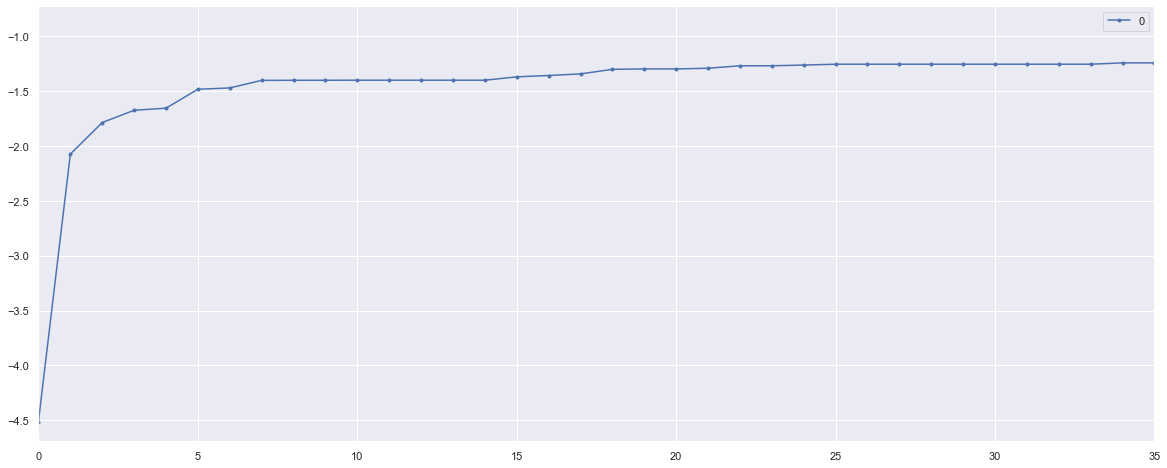

In [58]:
pd.DataFrame(np.sort(data_scores)).plot(stacked= True, xlim= [0,35], style= ".-");

In [59]:
np.sort(data_scores)[5]

-1.4829243915216646

In [60]:
esik_deger= np.sort(data_scores)[5]

In [61]:
aykiri_tf= data_scores < esik_deger

In [62]:
outlier_lof= data[data_scores < esik_deger]
outlier_lof

Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  \
5    Çakma profil + Tek sıra destek                50.0          3895   
43  Çok sıra ankrajlı kazıklı duvar                30.0        203900   
57   Çok sıra ankrajlı çakma profil                30.5          2581   
82    Çok sıra destekli perde duvar                20.0        135500   
83    Çok sıra destekli perde duvar                25.0        127760   

    H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
5         6200           0.0           7.0  
43        9000           5.0          20.0  
57       18300          22.0          18.0  
82       18500          67.0          27.0  
83       19000          27.0          42.0

In [63]:
outlier_lof_index= data[data_scores < esik_deger].index
outlier_lof_index


Int64Index([5, 43, 57, 82, 83], dtype='int64')

In [64]:
data.drop(index=outlier_lof_index, inplace= True)
data.shape

(116, 6)

In [65]:
data.index= np.arange(0,116)
data.head()

Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  \
0                    Diyafram duvar                46.7       1280000   
1  Diyafram duvar + Çok sıra destek                27.5       1280000   
2             Kesişen kazıklı duvar                60.0       2717000   
3  Diyafram duvar + Çok sıra destek                33.0        540000   
4         Kesişen + Tek sıra destek                85.0       1254800   

   H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
0       14000          34.0          60.0  
1       11000          20.0          35.0  
2       18000          28.0          34.0  
3       10000          10.0          13.0  
4        9700           0.0           3.0

### 2-Sigma yöntemi

In [66]:
data.columns

Index(['Destekleme_Sistemi', 'Destek_Aralıgı(mm)', 'EI\n(kNm2/m)',
       'H_Kazı(mm)', 'δv_Olcum(mm)', 'δh_Olcum(mm)'],
      dtype='object')

In [67]:
# δh_Olcum_(mm) için:

std= data["δh_Olcum(mm)"].std()
mean= data["δh_Olcum(mm)"].mean()
print("std :", std)
print("mean :", mean, "\n")

alt_2sigma= mean - 2*std
ust_2sigma= mean + 2*std

print("alt_2sigma: ", alt_2sigma)
print("ust_2sigma: ", ust_2sigma)

print(data[data["δh_Olcum(mm)"] < alt_2sigma].index)
print(data[data["δh_Olcum(mm)"] > ust_2sigma].index)

# aykiri_ust= data["δh_Olcum(mm)"] > ust_2sigma

#data["δh_Olcum(mm)"][aykiri_ust]= ust_2sigma

#data["δh_Olcum(mm)"][aykiri_ust]

aykırı_ust_ındex= data[data["δh_Olcum(mm)"] > ust_2sigma].index

     
"""
Int64Index([65, 81, 82, 89, 90, 96], dtype='int64')   2-sigma ust 
"""

# data[data["δh_Olcum(mm)"] > ust_2sigma]

data.drop(index=aykırı_ust_ındex, inplace= True)
# 65. 80. indeksi baskıladım gerini drop ettim.

std : 43.11812382222846
mean : 40.45258620689654 

alt_2sigma:  -45.78366143756038
ust_2sigma:  126.68883385135346
Int64Index([], dtype='int64')
Int64Index([67, 81, 82, 89, 90, 96], dtype='int64')


In [68]:
data.iloc[80:91,1:]

Destek_Aralıgı(mm)  EI\n(kNm2/m)  H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)
83                24.0         18850        9600          22.0          22.0
84                32.4        540000       16200          56.0          80.0
85                26.8        540000       10700          35.0          70.0
86                19.1         40000        7650          41.0          69.0
87                26.4       1280000       18450          42.0          60.0
88                26.3        857500       21000          31.0          62.0
91                53.0       2500000       16000          65.0          42.0
92                32.0       2500000       16000          62.0          16.0
93                37.5        540000       16000           1.0         125.0
94                36.3       2500000       14500         220.0         110.0
95                27.8        857500       13900          65.0          65.0

In [69]:
data.shape

(110, 6)

In [70]:
data.index=np.arange(0,110)

In [71]:
# δv_Olcum(mm) için:

std= data["δv_Olcum(mm)"].std()
mean= data["δv_Olcum(mm)"].mean()
print("std :", std)
print("mean :", mean, "\n")

alt_2sigma= mean - 2*std
ust_2sigma= mean + 2*std

print("alt_2sigma: ", alt_2sigma)
print("ust_2sigma: ", ust_2sigma, "\n")

# data["δv_Olcum_(mm)"] < alt_2sigma

print(data[data["δv_Olcum(mm)"] < alt_2sigma].index)
print(data[data["δv_Olcum(mm)"] > ust_2sigma].index)



aykiri_ust= data["δv_Olcum(mm)"] > ust_2sigma

#data["δv_Olcum(mm)"][aykiri_ust]= ust_2sigma
data["δv_Olcum(mm)"][aykiri_ust]



std : 36.64358644915297
mean : 29.588181818181816 

alt_2sigma:  -43.698991080124124
ust_2sigma:  102.87535471648775 

Int64Index([], dtype='int64')
Int64Index([62, 74, 75, 79, 89], dtype='int64')


62    180.0
74    120.0
75    190.0
79    130.0
89    220.0
Name: δv_Olcum(mm), dtype: float64

# Hata yapmışım altta kopyasını al ve bir de öyle hesapla!
## ama drop herhangi bir işe yaramadığı için devam edebilirim. Diyer yerlerde hata notlarına bak!

In [72]:
# aykiri_ust_index= data[data["δv_Olcum(mm)"] < alt_2sigma].index
# data.drop(index=aykiri_ust_index, inplace= True)

In [73]:
data.shape

(110, 6)

In [74]:
# Destek_Aralıgı(mm) için:

std= data["Destek_Aralıgı(mm)"].std()
mean= data["Destek_Aralıgı(mm)"].mean()
print("std :", std)
print("mean :", mean, "\n")

alt_2sigma= mean - 2*std
ust_2sigma= mean + 2*std

print("Destek_Aralıgı_alt: ", alt_2sigma)
print("Destek_Aralıgı_ust: ", ust_2sigma, "\n")

# data["Destek_Aralıgı(mm)"] < alt_2sigma

print(data[data["Destek_Aralıgı(mm)"] < alt_2sigma].index)
print(data[data["Destek_Aralıgı(mm)"] > ust_2sigma].index)


aykiri_ust= data["Destek_Aralıgı(mm)"] > ust_2sigma

# data["Destek_Aralıgı(mm)"][aykiri_ust]= ust_2sigma

data["Destek_Aralıgı(mm)"][aykiri_ust]

std : 21.55203933505094
mean : 45.146363636363645 

Destek_Aralıgı_alt:  2.042284966261768
Destek_Aralıgı_ust:  88.25044230646552 

Int64Index([], dtype='int64')
Int64Index([50, 55, 95, 96, 101], dtype='int64')


50     150.0
55      89.0
95     161.0
96     100.8
101     90.0
Name: Destek_Aralıgı(mm), dtype: float64

In [75]:
aykiri_ust_index= data[data["Destek_Aralıgı(mm)"] > ust_2sigma].index
data.drop(index= aykiri_ust_index, inplace=True)

In [76]:
data.shape

(105, 6)

In [77]:
data.index= np.arange(0,105)

In [78]:
# EI\n(kNm2/m) için:

std= data["EI\n(kNm2/m)"].std()
mean= data["EI\n(kNm2/m)"].mean()
print("std :", std)
print("mean :", mean, "\n")

alt_2sigma= mean - 2*std
ust_2sigma= mean + 2*std

print("EI\n(kNm2/m): ", alt_2sigma)
print("EI\n(kNm2/m): ", ust_2sigma, "\n")

print(data[data["EI\n(kNm2/m)"] < alt_2sigma].index)

print(data[data["EI\n(kNm2/m)"] > ust_2sigma].index)

print(data[data["EI\n(kNm2/m)"] > ust_2sigma])
# aykiri_ust= data["EI\n(kNm2/m)"] > ust_2sigma

# data["EI\n(kNm2/m)"][aykiri_ust]= ust_2sigma

data["EI\n(kNm2/m)"][aykiri_ust]

std : 1549549.9870086396
mean : 1397526.2857142857 

EI
(kNm2/m):  -1701573.6883029935
EI
(kNm2/m):  4496626.259731565 

Int64Index([], dtype='int64')
Int64Index([53, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103], dtype='int64')
                            Destekleme_Sistemi  Destek_Aralıgı(mm)  \
53              Çok sıra ankrajlı çakma profil                35.0   
93   Yukarıdan aşağıya çok sıra destekli duvar                65.0   
94   Yukarıdan aşağıya çok sıra destekli duvar                41.0   
95   Yukarıdan aşağıya çok sıra destekli duvar                49.0   
97            Yukarıdan aşağıya ankrajlı duvar                46.0   
98   Yukarıdan aşağıya çok sıra destekli duvar                59.0   
99   Yukarıdan aşağıya çok sıra destekli duvar                42.0   
100  Yukarıdan aşağıya çok sıra destekli duvar                42.0   
101  Yukarıdan aşağıya çok sıra destekli duvar                42.0   
102  Yukarıdan aşağıya çok sıra destekli duvar                49.0   
103

50     4320000
55     2571750
95     4600000
96     2700000
101    4600000
Name: EI\n(kNm2/m), dtype: int64

In [79]:
aykırı_ust_index= data[data["EI\n(kNm2/m)"] > ust_2sigma].index
data.drop(index= aykırı_ust_index, inplace= True )

In [80]:
data.shape

(94, 6)

In [81]:
data.index= np.arange(0,94)

In [82]:
# H_Kazı(mm) için:

std= data["H_Kazı(mm)"].std()
mean= data["H_Kazı(mm)"].mean()
print("std :", std)
print("mean :", mean)

alt_2sigma= mean - 2*std
ust_2sigma= mean + 2*std

print("H_Kazı(mm)_alt: ", alt_2sigma)
print("H_Kazı(mm)_ust: ", ust_2sigma)


print(data[data["H_Kazı(mm)"] < alt_2sigma].index)

print(data[data["H_Kazı(mm)"] > ust_2sigma].index)

#print(data[data["H_Kazı(mm)"] > ust_2sigma])
aykiri_ust= data["H_Kazı(mm)"] > ust_2sigma

#data["H_Kazı(mm)"][aykiri_ust]= ust_2sigma

data["H_Kazı(mm)"][aykiri_ust]

std : 5594.380821341496
mean : 14250.0
H_Kazı(mm)_alt:  3061.238357317008
H_Kazı(mm)_ust:  25438.76164268299
Int64Index([], dtype='int64')
Int64Index([39, 59, 60, 74], dtype='int64')


39    37000
59    26000
60    28000
74    30000
Name: H_Kazı(mm), dtype: int64

In [83]:
data[data["H_Kazı(mm)"] > ust_2sigma]

Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  \
39   Çok sıra ankrajlı kazıklı duvar                17.5        763400   
59  Yukarıdan aşağıya diyafram duvar                40.0       2500000   
60    Yukarıdan aşağıya çakma profil                47.0       4320000   
74  Çok sıra destekli diyafram duvar                27.3       4320000   

    H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
39       37000          10.0          15.0  
59       26000         180.0          36.0  
60       28000          37.0          75.0  
74       30000          23.0          20.0

In [84]:
aykiri_ust_aykırı_index= data[data["H_Kazı(mm)"] > ust_2sigma].index

data.drop(index= aykiri_ust_aykırı_index, inplace= True)

In [85]:
data.shape

(90, 6)

In [86]:
data.index= np.arange(0,90)

In [87]:
data.head()

Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  \
0                    Diyafram duvar                46.7       1280000   
1  Diyafram duvar + Çok sıra destek                27.5       1280000   
2             Kesişen kazıklı duvar                60.0       2717000   
3  Diyafram duvar + Çok sıra destek                33.0        540000   
4         Kesişen + Tek sıra destek                85.0       1254800   

   H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
0       14000          34.0          60.0  
1       11000          20.0          35.0  
2       18000          28.0          34.0  
3       10000          10.0          13.0  
4        9700           0.0           3.0

### Boxplot ile aykırılık analizi devam

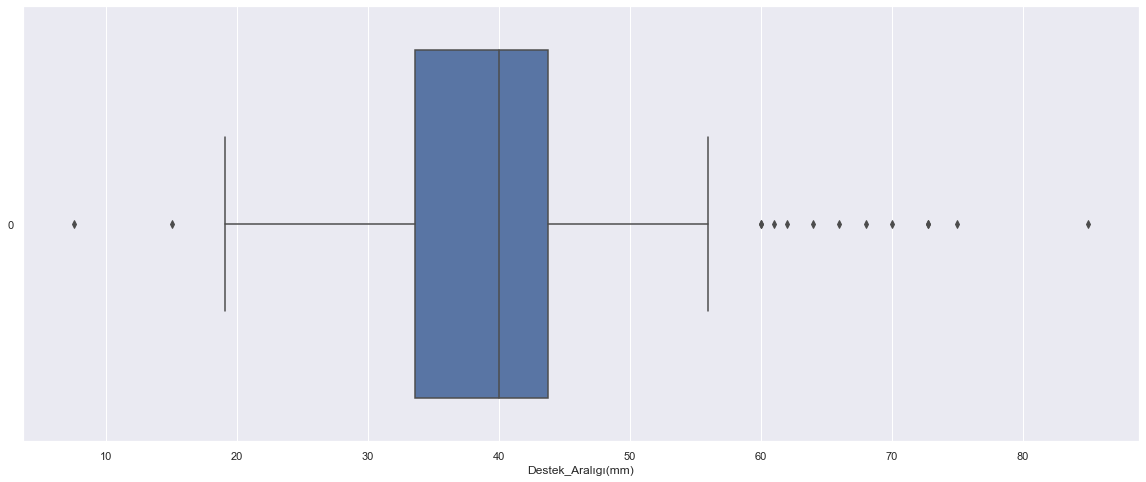

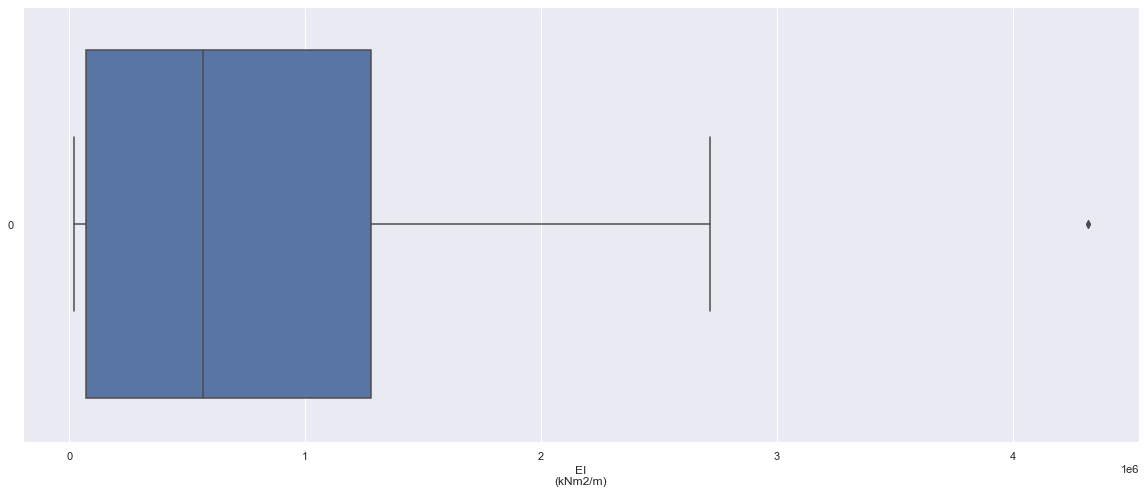

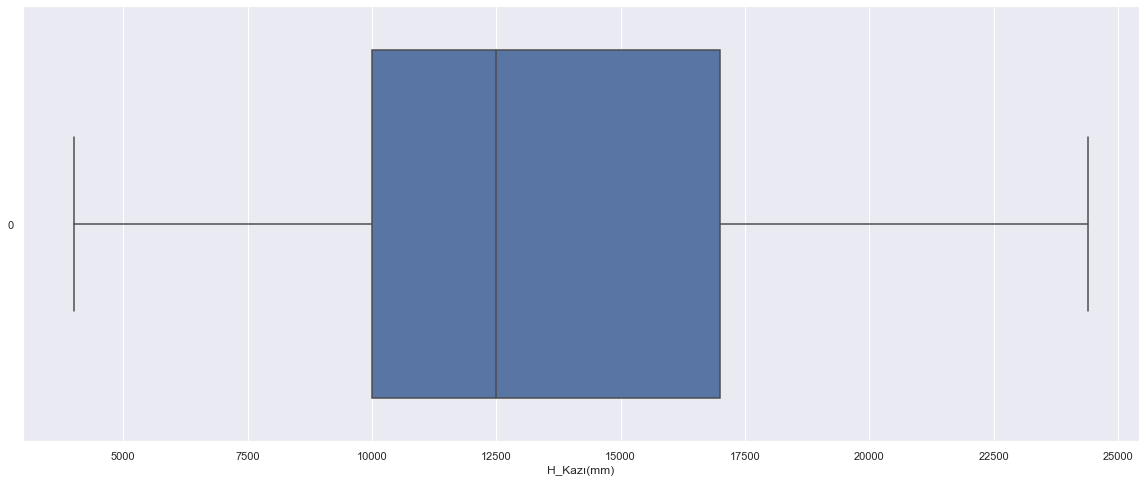

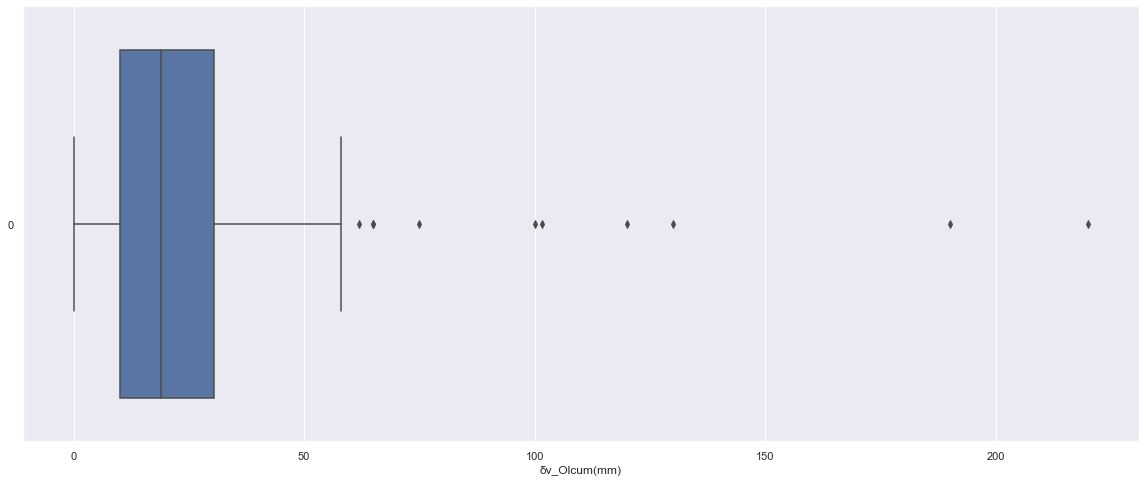

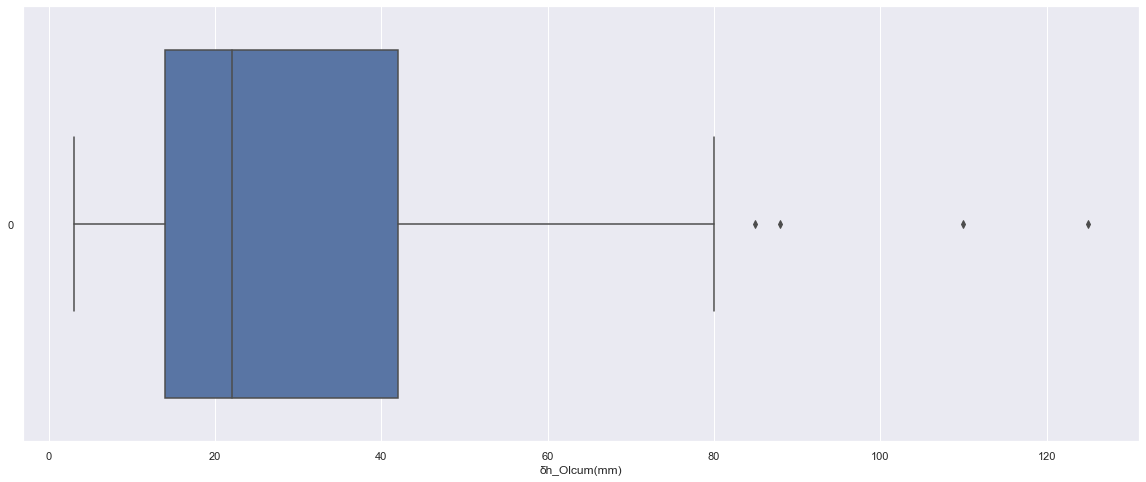

In [88]:
for column in data.iloc[:,1:]:
    sns.boxplot(data= data[column], orient= "h" );
    plt.xlabel(column)
    plt.show()
    """
    Index(['Destekleme_Sistemi', 'Destek_Aralıgı(mm)', 'EI\n(kNm2/m)',
       'H_Kazı(mm)', 'δv_Olcum(mm)', 'δh_Olcum(mm)'],
      dtype='object')
    """


In [89]:
# δh_Olcum(mm) boxplot:

Q1= data["δh_Olcum(mm)"].quantile(0.25)
Q3= data["δh_Olcum(mm)"].quantile(0.75)
IQR= Q3 - Q1  # Interquartile Range - Çeyrekler açıklığı (IQR)

alt_sinir_δh_Olcum= Q1 - 1.5*IQR
ust_sinir_δh_Olcum= Q3 + 1.5*IQR


print(Q1)
print(Q3)
print(IQR, "\n")

print(alt_sinir_δh_Olcum)
print(ust_sinir_δh_Olcum, "\n")



aykırı_alt_δh_Olcum_index= data[data["δh_Olcum(mm)"] < alt_sinir_δh_Olcum].index

print(aykırı_alt_δh_Olcum_index)



aykırı_ust_δh_Olcum_index= data[data["δh_Olcum(mm)"] > ust_sinir_δh_Olcum].index
print(aykırı_ust_δh_Olcum_index)

data[data["δh_Olcum(mm)"] > ust_sinir_δh_Olcum]
# 65 index baskılandı  68, 81, 82. drop edildi1 veri dağılımına uymamakta!

14.0
42.0
28.0 

-28.0
84.0 

Int64Index([], dtype='int64')
Int64Index([65, 68, 81, 82], dtype='int64')


Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  \
65         Çok sıra destek - 'Arbed'                40.0        685000   
68     Tek sıra destekli perde duvar                50.0         50000   
81  Çok sıra ankrajlı diyafram duvar                37.5        540000   
82  Yukarıdan aşağıya diyafram duvar                36.3       2500000   

    H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
65       15000          75.0          88.0  
68        6500         120.0          85.0  
81       16000           1.0         125.0  
82       14500         220.0         110.0

In [90]:
aykırı_ust_δh_Olcum= data["δh_Olcum(mm)"] > ust_sinir_δh_Olcum


In [91]:
data["δh_Olcum(mm)"][aykırı_ust_δh_Olcum] = ust_sinir_δh_Olcum

<ipython-input-91-871ac097975e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["δh_Olcum(mm)"][aykırı_ust_δh_Olcum] = ust_sinir_δh_Olcum


In [92]:
data["δh_Olcum(mm)"][aykırı_ust_δh_Olcum]

65    84.0
68    84.0
81    84.0
82    84.0
Name: δh_Olcum(mm), dtype: float64

In [93]:
data.drop(index=[68,81,82], inplace= True) # 67, 81, 83

#data.drop(index=aykırı_ust_δv_Olcum__index, inplace= True)

In [94]:
data.shape

(87, 6)

In [95]:
data.index= np.arange(0,87)

In [96]:
data.tail(10)

Destekleme_Sistemi  Destek_Aralıgı(mm)  \
77           Çok sıra destekli diyafram duvar                26.3   
78           Çok sıra destekli diyafram duvar                53.0   
79           Çok sıra destekli diyafram duvar                32.0   
80           Yukarıdan aşağıya diyafram duvar                27.8   
81              Yukarıdan aşağıya perde duvar                30.0   
82                      Kesişen kazıklı duvar                56.0   
83                      Kesişen kazıklı duvar                72.8   
84                      Sürekli kazıklı duvar                72.8   
85  Yukarıdan aşağıya çok sıra destekli duvar                45.0   
86  Yukarıdan aşağıya çok sıra destekli duvar                53.0   

    EI\n(kNm2/m)  H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
77        857500       21000          31.0          62.0  
78       2500000       16000          65.0          42.0  
79       2500000       16000          62.0          16.0  
80        857500       13900          65.0          65.0  
81        483600        9600         100.0          48.0  
82       2571750        4000          20.0          20.0  
83       2330250        5200          18.0          10.0  
84       1198500        5200           0.0          11.0  
85       2700000       18000          20.0          42.0  
86       2700000       16000          10.0          30.0

In [97]:
# δv_Olcum(mm) boxplot:

Q1= data["δv_Olcum(mm)"].quantile(0.25)
Q3= data["δv_Olcum(mm)"].quantile(0.75)
IQR= Q3 - Q1  # Interquartile Range - Çeyrekler açıklığı (IQR)

alt_sinir_δv_Olcum= Q1 - 1.5*IQR
ust_sinir_δv_Olcum= Q3 + 1.5*IQR


print(Q1)
print(Q3)
print(IQR, "\n")

print(alt_sinir_δv_Olcum)
print(ust_sinir_δv_Olcum, "\n")



aykırı_alt_δv_Olcum_index= data[data["δh_Olcum(mm)"] < alt_sinir_δv_Olcum].index

print(aykırı_alt_δv_Olcum_index)



aykırı_ust_δv_Olcum_index= data[data["δv_Olcum(mm)"] > ust_sinir_δv_Olcum].index
print(aykırı_ust_δv_Olcum_index)

data[data["δv_Olcum(mm)"] > ust_sinir_δv_Olcum]
# 65. 80. indexler baskılandı 58, 68, 71, 78, 79, 81 drop edildi1 veri dağılımına uymamakta!

10.0
30.5
20.5 

-20.75
61.25 

Int64Index([], dtype='int64')
Int64Index([58, 65, 68, 71, 78, 79, 80, 81], dtype='int64')


Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  \
58  Yukarıdan aşağıya diyafram duvar                33.6       1106125   
65         Çok sıra destek - 'Arbed'                40.0        685000   
68     Çok sıra destekli perde duvar                45.0         73800   
71  Çok sıra destekli diyafram duvar                26.0       4320000   
78  Çok sıra destekli diyafram duvar                53.0       2500000   
79  Çok sıra destekli diyafram duvar                32.0       2500000   
80  Yukarıdan aşağıya diyafram duvar                27.8        857500   
81     Yukarıdan aşağıya perde duvar                30.0        483600   

    H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
58       19800         101.6          50.8  
65       15000          75.0          84.0  
68       11500         190.0          32.0  
71       13000         130.0          56.0  
78       16000          65.0          42.0  
79       16000          62.0          16.0  
80       13900          65.0          65.0  
81        9600         100.0          48.0

In [98]:
aykırı_ust_δv_Olcum=  data["δv_Olcum(mm)"] > ust_sinir_δv_Olcum

In [99]:
data["δv_Olcum(mm)"][aykırı_ust_δv_Olcum] = ust_sinir_δv_Olcum

<ipython-input-99-05d8f9feb946>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["δv_Olcum(mm)"][aykırı_ust_δv_Olcum] = ust_sinir_δv_Olcum


In [100]:
data.drop(index=[58, 68, 71, 78, 79, 81], inplace=True) # 57, 67, 69, 72, 79, 80, 82

## shape değişti 81,6 oldu önceden 80,6 idi.

In [101]:
data.shape

(81, 6)

In [102]:
data.index= np.arange(0,81)

In [103]:
# H_Kazı(mm) boxplot:

Q1= data["H_Kazı(mm)"].quantile(0.25)
Q3= data["H_Kazı(mm)"].quantile(0.75)
IQR= Q3 - Q1  # Interquartile Range - Çeyrekler açıklığı (IQR)

alt_sinir_H_Kazı= Q1 - 1.5*IQR
ust_sinir_H_Kazı= Q3 + 1.5*IQR


print(Q1)
print(Q3)
print(IQR, "\n")

print(alt_sinir_H_Kazı)
print(ust_sinir_H_Kazı, "\n")



aykırı_alt_H_Kazı_index= data[data["H_Kazı(mm)"] < alt_sinir_H_Kazı].index

print(aykırı_alt_H_Kazı_index)



aykırı_ust_H_Kazı_index= data[data["H_Kazı(mm)"] > ust_sinir_H_Kazı].index
print(aykırı_ust_H_Kazı_index)

data[data["H_Kazı(mm)"] > ust_sinir_H_Kazı]
# 64. index baskılandı diğerleri drop edildi1 veri dağılımına uymamakta!

10000.0
17000.0
7000.0 

-500.0
27500.0 

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


Empty DataFrame
Columns: [Destekleme_Sistemi, Destek_Aralıgı(mm), EI
(kNm2/m), H_Kazı(mm), δv_Olcum(mm), δh_Olcum(mm)]
Index: []

In [104]:
# EI\n(kNm2/m) boxplot:

Q1= data["EI\n(kNm2/m)"].quantile(0.25)
Q3= data["EI\n(kNm2/m)"].quantile(0.75)
IQR= Q3 - Q1  # Interquartile Range - Çeyrekler açıklığı (IQR)

alt_sinir_EI= Q1 - 1.5*IQR
ust_sinir_EI= Q3 + 1.5*IQR


print(Q1)
print(Q3)
print(IQR, "\n")

print(alt_sinir_EI)
print(ust_sinir_EI, "\n")



aykırı_alt_EI_index= data[data["EI\n(kNm2/m)"] < alt_sinir_EI].index

print(aykırı_alt_EI_index)



aykırı_ust_EI_index= data[data["EI\n(kNm2/m)"] > ust_sinir_EI].index
print(aykırı_ust_EI_index)

data[data["EI\n(kNm2/m)"] > ust_sinir_EI]
# 64. index baskılandı diğerleri drop edildi! veri dağılımına uymamakta!

73500.0
1280000.0
1206500.0 

-1736250.0
3089750.0 

Int64Index([], dtype='int64')
Int64Index([49], dtype='int64')


Destekleme_Sistemi  Destek_Aralıgı(mm)  EI\n(kNm2/m)  \
49  Çok sıra ankrajlı çakma profil                 7.5       4320000   

    H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
49       18500           5.0          15.0

In [105]:
aykırı_ust_EI =  data["EI\n(kNm2/m)"] > ust_sinir_EI

In [106]:
data["EI\n(kNm2/m)"][aykırı_ust_EI] = ust_sinir_EI

<ipython-input-106-6e144781b291>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["EI\n(kNm2/m)"][aykırı_ust_EI] = ust_sinir_EI


In [107]:
data["EI\n(kNm2/m)"][aykırı_ust_EI]

49    3089750
Name: EI\n(kNm2/m), dtype: int64

In [108]:
data.shape

(81, 6)

In [109]:
# Destek_Aralıgı(mm) boxplot:

Q1= data["Destek_Aralıgı(mm)"].quantile(0.25)
Q3= data["Destek_Aralıgı(mm)"].quantile(0.75)
IQR= Q3 - Q1  # Interquartile Range - Çeyrekler açıklığı (IQR)

alt_sinir_DA= Q1 - 1.5*IQR
ust_sinir_DA= Q3 + 1.5*IQR


print(Q1)
print(Q3)
print(IQR, "\n")

print(alt_sinir_DA)
print(ust_sinir_DA, "\n")



aykırı_alt_DA_index= data[data["Destek_Aralıgı(mm)"] < alt_sinir_DA].index

print(aykırı_alt_DA_index)



aykırı_ust_DA_index= data[data["Destek_Aralıgı(mm)"] > ust_sinir_DA].index
print(aykırı_ust_DA_index)

data[data["Destek_Aralıgı(mm)"] > ust_sinir_DA]
# 64. index baskılandı diğerleri drop edildi1 veri dağılımına uymamakta!

33.6
40.0
6.399999999999999 

24.000000000000004
49.599999999999994 

Int64Index([38, 40, 49, 69, 72], dtype='int64')
Int64Index([2, 4, 5, 9, 10, 34, 35, 36, 37, 48, 53, 54, 67, 76, 77, 78, 80], dtype='int64')


Destekleme_Sistemi  Destek_Aralıgı(mm)  \
2                       Kesişen kazıklı duvar                60.0   
4                   Kesişen + Tek sıra destek                85.0   
5               Perde Duvar + Tek sıra destek                60.0   
9             Çok sıra destekli kazıklı duvar                55.0   
10              Perde Duvar + Çok sıra destek                75.0   
34            Çok sıra destekli kesişen kazık                66.0   
35            Çok sıra destekli kesişen kazık                64.0   
36             Tek sıra destekli çakma profil                50.0   
37           Çok sıra destekli diyafram duvar                62.0   
48     Tek sıra destekli palplanş perde duvar                68.0   
53          Yukarıdan aşağıya + Kazıklı duvar                50.0   
54          Yukarıdan aşağıya + Kazıklı duvar                70.0   
67           Çok sıra destekli diyafram duvar                61.0   
76                      Kesişen kazıklı duvar                56.0   
77                      Kesişen kazıklı duvar                72.8   
78                      Sürekli kazıklı duvar                72.8   
80  Yukarıdan aşağıya çok sıra destekli duvar                53.0   

    EI\n(kNm2/m)  H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  
2        2717000       18000          28.0          34.0  
4        1254800        9700           0.0           3.0  
5          58500        7200           2.0           5.0  
9        1126000       21900           4.8          13.5  
10         20000       15000           7.0          14.0  
34       1134000       21900          12.0          20.0  
35        805000       19300          23.0          44.0  
36       1280000       10000          26.0          17.0  
37       2500000       18700          58.0          29.0  
48         96440        9300          27.0          25.0  
53       2571750       24400          30.0          30.0  
54        618000       10000           2.0          10.0  
67       2500000       18500          40.0          15.0  
76       2571750        4000          20.0          20.0  
77       2330250        5200          18.0          10.0  
78       1198500        5200           0.0          11.0  
80       2700000       16000          10.0          30.0

In [110]:
# aykırı_ust_DA =  data["Destek_Aralıgı(mm)"] > ust_sinir_DA

In [111]:
# data["Destek_Aralıgı(mm)"][aykırı_ust_DA] = ust_sinir_DA

In [112]:
# data["Destek_Aralıgı(mm)"][aykırı_ust_DA]

In [113]:
# data.shape

In [114]:
# aykırı_alt_DA =  data["Destek_Aralıgı(mm)"] > alt_sinir_DA

In [115]:
# data["Destek_Aralıgı(mm)"][aykırı_alt_DA] = alt_sinir_DA

In [116]:
# data["Destek_Aralıgı(mm)"][aykırı_alt_DA]

In [117]:
# data["Iksa_Cap(mm)"][48] = 800

### Değişken Dönüşümleri 

#### OneHot Encoder - Dummy Değişken Tuzağı

In [118]:
# eğitim 248 Veri Bilimi ve Makine Öğrenmesi UDEMY

In [119]:
data.groupby(by= data["Destekleme_Sistemi"]).count()

Destek_Aralıgı(mm)  EI\n(kNm2/m)  \
Destekleme_Sistemi                                                            
Diyafram duvar                                              1             1   
Diyafram duvar + Çok sıra destek                            2             2   
Kesişen + Tek sıra destek                                   1             1   
Kesişen kazıklı duvar                                       3             3   
Perde Duvar + Tek sıra destek                               1             1   
Perde Duvar + Çok sıra destek                               2             2   
Perde H Profil + Çok sıra destek                            9             9   
Sürekli kazıklı duvar                                       1             1   
Tek sıra destekli palplanş perde duvar                      1             1   
Tek sıra destekli çakma profil                              1             1   
Yukarıdan aşağıya + Kazıklı duvar                           2             2   
Yukarıdan aşağıya diyafram duvar                            6             6   
Yukarıdan aşağıya çakma profil                              1             1   
Yukarıdan aşağıya çok sıra destekli duvar                   2             2   
Çok sıra ankrajlı diyafram duvar                            6             6   
Çok sıra ankrajlı kazıklı duvar                             2             2   
Çok sıra ankrajlı çakma profil                              6             6   
Çok sıra destek - 'Arbed'                                   1             1   
Çok sıra destekli diyafram duvar                            7             7   
Çok sıra destekli kazıklı duvar                             2             2   
Çok sıra destekli kesişen kazık                             2             2   
Çok sıra destekli perde duvar                               8             8   
Çok sıra destekli sürekli kazıklı duvar                     8             8   
Çok sıra destekli çakma profil                              6             6   

                                           H_Kazı(mm)  δv_Olcum(mm)  \
Destekleme_Sistemi                                                    
Diyafram duvar                                      1             1   
Diyafram duvar + Çok sıra destek                    2             2   
Kesişen + Tek sıra destek                           1             1   
Kesişen kazıklı duvar                               3             3   
Perde Duvar + Tek sıra destek                       1             1   
Perde Duvar + Çok sıra destek                       2             2   
Perde H Profil + Çok sıra destek                    9             9   
Sürekli kazıklı duvar                               1             1   
Tek sıra destekli palplanş perde duvar              1             1   
Tek sıra destekli çakma profil                      1             1   
Yukarıdan aşağıya + Kazıklı duvar                   2             2   
Yukarıdan aşağıya diyafram duvar                    6             6   
Yukarıdan aşağıya çakma profil                      1             1   
Yukarıdan aşağıya çok sıra destekli duvar           2             2   
Çok sıra ankrajlı diyafram duvar                    6             6   
Çok sıra ankrajlı kazıklı duvar                     2             2   
Çok sıra ankrajlı çakma profil                      6             6   
Çok sıra destek - 'Arbed'                           1             1   
Çok sıra destekli diyafram duvar                    7             7   
Çok sıra destekli kazıklı duvar                     2             2   
Çok sıra destekli kesişen kazık                     2             2   
Çok sıra destekli perde duvar                       8             8   
Çok sıra destekli sürekli kazıklı duvar             8             8   
Çok sıra destekli çakma profil                      6             6   

                                           δh_Olcum(mm)  
Destekleme_Sistemi                                       
Diyafram duvar           

In [120]:
data_one_hot = pd.get_dummies(data, columns=["Destekleme_Sistemi"], prefix= ["Tip:"], drop_first=True)   # .astype("float")
data_one_hot.head()

Destek_Aralıgı(mm)  EI\n(kNm2/m)  H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  \
0                46.7       1280000       14000          34.0          60.0   
1                27.5       1280000       11000          20.0          35.0   
2                60.0       2717000       18000          28.0          34.0   
3                33.0        540000       10000          10.0          13.0   
4                85.0       1254800        9700           0.0           3.0   

   Tip:_Diyafram duvar + Çok sıra destek  Tip:_Kesişen + Tek sıra destek  \
0                                      0                               0   
1                                      1                               0   
2                                      0                               0   
3                                      1                               0   
4                                      0                               1   

   Tip:_Kesişen kazıklı duvar  Tip:_Perde Duvar + Tek sıra destek  \
0                           0                                   0   
1                           0                                   0   
2                           1                                   0   
3                           0                                   0   
4                           0                                   0   

   Tip:_Perde Duvar + Çok sıra destek  ...  \
0                                   0  ...   
1                                   0  ...   
2                                   0  ...   
3                                   0  ...   
4                                   0  ...   

   Tip:_Çok sıra ankrajlı diyafram duvar  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Tip:_Çok sıra ankrajlı kazıklı duvar  Tip:_Çok sıra ankrajlı çakma profil  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   Tip:_Çok sıra destek - 'Arbed'  Tip:_Çok sıra destekli diyafram duvar  \
0                               0                                      0   
1                               0                                      0   
2                               0                                      0   
3                               0                                      0   
4                               0                                      0   

   Tip:_Çok sıra destekli kazıklı duvar  Tip:_Çok sıra destekli kesişen kazık  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   Tip:_Çok sıra destekli perde duvar  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Tip:_Çok sıra destekli sürekli kazıklı duvar  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Tip:_Çok sıra destekli çakma profil  
0                                    0  
1                                    0  
2           

In [121]:
""" 
data_one_hot_son = pd.get_dummies(data_one_hot,columns= ["Zemin/Kaya"], prefix=["Zemin/Kaya"] ,drop_first=True)
data_one_hot_son.head()
"""

' \ndata_one_hot_son = pd.get_dummies(data_one_hot,columns= ["Zemin/Kaya"], prefix=["Zemin/Kaya"] ,drop_first=True)\ndata_one_hot_son.head()\n'

##### DUMMY TUZAĞI
Bir değişkeni diğer değişkenden bulabiliyorsan birini çıkarman gerekir çünkü makine öğrenmesinde bazı algoritmaları uğraştırmış olursun ve linearreg gibi algoritmalarda verileri okuyamaya bilir üst üste çakışma olacağı için.
Tüm bunları yaptıktan DUMMY TUZAĞINA düşmemek için yatay destek ankrajı misal çıkarabilirsin.

In [122]:
# data_one_hot.drop(columns= "Destekleme_Sistemi", axis=1, inplace= True)

In [123]:
data_one_hot.head()

Destek_Aralıgı(mm)  EI\n(kNm2/m)  H_Kazı(mm)  δv_Olcum(mm)  δh_Olcum(mm)  \
0                46.7       1280000       14000          34.0          60.0   
1                27.5       1280000       11000          20.0          35.0   
2                60.0       2717000       18000          28.0          34.0   
3                33.0        540000       10000          10.0          13.0   
4                85.0       1254800        9700           0.0           3.0   

   Tip:_Diyafram duvar + Çok sıra destek  Tip:_Kesişen + Tek sıra destek  \
0                                      0                               0   
1                                      1                               0   
2                                      0                               0   
3                                      1                               0   
4                                      0                               1   

   Tip:_Kesişen kazıklı duvar  Tip:_Perde Duvar + Tek sıra destek  \
0                           0                                   0   
1                           0                                   0   
2                           1                                   0   
3                           0                                   0   
4                           0                                   0   

   Tip:_Perde Duvar + Çok sıra destek  ...  \
0                                   0  ...   
1                                   0  ...   
2                                   0  ...   
3                                   0  ...   
4                                   0  ...   

   Tip:_Çok sıra ankrajlı diyafram duvar  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Tip:_Çok sıra ankrajlı kazıklı duvar  Tip:_Çok sıra ankrajlı çakma profil  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   Tip:_Çok sıra destek - 'Arbed'  Tip:_Çok sıra destekli diyafram duvar  \
0                               0                                      0   
1                               0                                      0   
2                               0                                      0   
3                               0                                      0   
4                               0                                      0   

   Tip:_Çok sıra destekli kazıklı duvar  Tip:_Çok sıra destekli kesişen kazık  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   Tip:_Çok sıra destekli perde duvar  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Tip:_Çok sıra destekli sürekli kazıklı duvar  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Tip:_Çok sıra destekli çakma profil  
0                                    0  
1                                    0  
2           

In [124]:
df= data_one_hot.copy()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Destek_Aralıgı(mm)                              81 non-null     float64
 1   EI
(kNm2/m)                                     81 non-null     int64  
 2   H_Kazı(mm)                                      81 non-null     int64  
 3   δv_Olcum(mm)                                    81 non-null     float64
 4   δh_Olcum(mm)                                    81 non-null     float64
 5   Tip:_Diyafram duvar + Çok sıra destek           81 non-null     uint8  
 6   Tip:_Kesişen + Tek sıra destek                  81 non-null     uint8  
 7   Tip:_Kesişen kazıklı duvar                      81 non-null     uint8  
 8   Tip:_Perde Duvar + Tek sıra destek              81 non-null     uint8  
 9   Tip:_Perde Duvar + Çok sıra destek           

In [126]:
""" 
df["Destek_STRUT DESTEKLİ KAZIK"] = df["Destek_STRUT DESTEKLİ KAZIK"].astype("float")
df["Zemin/Kaya"] = df["Zemin/Kaya"].astype("float")
"""


' \ndf["Destek_STRUT DESTEKLİ KAZIK"] = df["Destek_STRUT DESTEKLİ KAZIK"].astype("float")\ndf["Zemin/Kaya"] = df["Zemin/Kaya"].astype("float")\n'

In [127]:
""" 
df.info()
"""

' \ndf.info()\n'

In [128]:
df.isnull().sum().sort_values()

Destek_Aralıgı(mm)                                0
Tip:_Çok sıra destekli perde duvar                0
Tip:_Çok sıra destekli kesişen kazık              0
Tip:_Çok sıra destekli kazıklı duvar              0
Tip:_Çok sıra destekli diyafram duvar             0
Tip:_Çok sıra destek - 'Arbed'                    0
Tip:_Çok sıra ankrajlı çakma profil               0
Tip:_Çok sıra ankrajlı kazıklı duvar              0
Tip:_Çok sıra ankrajlı diyafram duvar             0
Tip:_Yukarıdan aşağıya çok sıra destekli duvar    0
Tip:_Yukarıdan aşağıya çakma profil               0
Tip:_Yukarıdan aşağıya diyafram duvar             0
Tip:_Yukarıdan aşağıya + Kazıklı duvar            0
Tip:_Tek sıra destekli çakma profil               0
Tip:_Tek sıra destekli palplanş perde duvar       0
Tip:_Sürekli kazıklı duvar                        0
Tip:_Perde H Profil + Çok sıra destek             0
Tip:_Perde Duvar + Çok sıra destek                0
Tip:_Perde Duvar + Tek sıra destek                0
Tip:_Kesişen

### STANDARDİZASYON

In [129]:
"""
from sklearn.preprocessing import StandardScaler, normalize # normalize
"""

'\nfrom sklearn.preprocessing import StandardScaler, normalize # normalize\n'

In [130]:
"""
scaler = StandardScaler()

"""

"""
normalizer = normalize()
X_train_normalized= normalize(X_train)
"""

'\nnormalizer = normalize()\nX_train_normalized= normalize(X_train)\n'

In [131]:
"""
df= scaler.fit_transform(df)
"""

'\ndf= scaler.fit_transform(df)\n'

In [132]:
"""
df= pd.DataFrame(df)
df.head()
"""

'\ndf= pd.DataFrame(df)\ndf.head()\n'

In [133]:
"""
df.columns= ["δh_Olcum_(mm)","δv_Olcum_(mm)","H_Kazı_(mm)", 
                  "Duvardan_Uzaklık_(mm)", "Iksa_Cap(mm)", 
                  "Iksa_L_(mm)", "Destek_STRUT DESTEKLİ KAZIK"]
df.head()
"""

'\ndf.columns= ["δh_Olcum_(mm)","δv_Olcum_(mm)","H_Kazı_(mm)", \n                  "Duvardan_Uzaklık_(mm)", "Iksa_Cap(mm)", \n                  "Iksa_L_(mm)", "Destek_STRUT DESTEKLİ KAZIK"]\ndf.head()\n'

In [134]:
"""
df.info()
"""


'\ndf.info()\n'

In [135]:
# scale degerleri ile eğitime tabi tuttuk 
# normalize degerler ile egitime tutuk

In [136]:
"""
X_train_scaled= scaler.fit_transform(X_train)
"""

'\nX_train_scaled= scaler.fit_transform(X_train)\n'

In [137]:
"""
X_test_scaled= scaler.fit_transform(X_test)
"""

'\nX_test_scaled= scaler.fit_transform(X_test)\n'

In [33]:
data.dropna(inplace=True)

# EĞİTİM 

In [8]:
from sklearn.model_selection import train_test_split, cross_validate

"""X= data.iloc[:-9,2:-1].values  / y= data.iloc[:-9,-1].values"""      
#values: numpy.array yapıyor....


In [9]:
data.shape

(121, 6)

# aşağıdan yukarı yok bir öncekine nazaran _07 ye 

In [10]:
data.columns 

Index(['Destekleme_Sistemi', 'Destek_Aralıgı(mm)', 'EI\n(kNm2/m)',
       'H_Kazı(mm)', 'δv_Olcum(mm)', 'δh_Olcum(mm)'],
      dtype='object')

In [11]:
data.shape

(121, 6)

In [12]:
X = data.drop(["δh_Olcum(mm)","Destekleme_Sistemi"], axis=1)
X.head()

Destek_Aralıgı(mm)  EI\n(kNm2/m)  H_Kazı(mm)  δv_Olcum(mm)
0                46.7       1280000       14000          34.0
1                27.5       1280000       11000          20.0
2                60.0       2717000       18000          28.0
3                33.0        540000       10000          10.0
4                85.0       1254800        9700           0.0

In [13]:
y=data["δh_Olcum(mm)"]
y.head()

0    60.0
1    35.0
2    34.0
3    13.0
4     3.0
Name: δh_Olcum(mm), dtype: float64

#uint8 ne demek veri tipi olarak!

In [14]:
data.describe().T

count          mean           std     min      25%  \
Destek_Aralıgı(mm)  121.0  4.347851e+01  2.137460e+01     7.5     33.3   
EI\n(kNm2/m)        121.0  1.342476e+06  1.562748e+06  2581.0  73500.0   
H_Kazı(mm)          121.0  1.480992e+04  5.833469e+03  4000.0  10700.0   
δv_Olcum(mm)        121.0  3.572479e+01  4.842943e+01     0.0     10.0   
δh_Olcum(mm)        121.0  3.972314e+01  4.242300e+01     3.0     15.0   

                         50%        75%        max  
Destek_Aralıgı(mm)      40.0       49.0      161.0  
EI\n(kNm2/m)        685000.0  2500000.0  5400000.0  
H_Kazı(mm)           14000.0    18300.0    37000.0  
δv_Olcum(mm)            20.0       35.0      270.0  
δh_Olcum(mm)            25.4       48.0      280.0

# EĞİTİM VE TEST
## eğitimi kendi için eğitim ve doğrulama diye ayırma yapıyoruz.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=27)
X_train, X_validasyon, y_train, y_validasyon = train_test_split(X_train, y_train, test_size=11 ,random_state=16)
# X_train, X_validasyon, y_train, y_validasyon = train_test_split(X_train, y_train, test_size=6 ,random_state=6 ) r2 : 0.65384
# modelin eğitimi bittikten sonra model performansına bakmış olacaz. Train için da validasyona ayırma işlemi aslında bu!

In [16]:
# y_train , y_test yaklaşık eşit dağılmış mı ?! 
pd.DataFrame(y_train).mean()

δh_Olcum(mm)    40.826374
dtype: float64

In [17]:
pd.DataFrame(y_validasyon).mean() # 25lerde idi.

δh_Olcum(mm)    35.427273
dtype: float64

In [18]:
pd.DataFrame(y_test).mean()

δh_Olcum(mm)    36.926316
dtype: float64

In [19]:
type(X_train)

pandas.core.frame.DataFrame

In [20]:
X_train.mean()

Destek_Aralıgı(mm)    4.386703e+01
EI\n(kNm2/m)          1.428592e+06
H_Kazı(mm)            1.478022e+04
δv_Olcum(mm)          3.807802e+01
dtype: float64

In [21]:
X_test.mean()

Destek_Aralıgı(mm)    4.108947e+01
EI\n(kNm2/m)          1.311018e+06
H_Kazı(mm)            1.510526e+04
δv_Olcum(mm)          2.965263e+01
dtype: float64

In [22]:
len(y_train)

91

In [23]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

print(X_validasyon.shape)
print(y_validasyon.shape)


(91, 4)
(19, 4)
(91,)
(19,)
(11, 4)
(11,)


In [24]:
# model kurulum

### STANDARDİZASYON 
GİRDİ parametrelerinin standardizasonu!

In [25]:
from sklearn.preprocessing import StandardScaler, normalize # normalize

In [26]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)

In [27]:
pd.DataFrame(X_train_scaled).head()

0         1         2         3
0  0.273612 -0.890003 -1.511307 -0.725304
1 -1.287852 -0.443473  1.447820 -0.628160
2 -0.779261 -0.092825  0.646390  0.074705
3 -0.172521 -0.846521 -0.841981 -0.591969
4 -0.797106 -0.189028  0.619969 -0.691018

In [28]:
# X_test_scaled= scaler.fit_transform(X_test)

"""
0	1	2	3	4	5	6	7	8	9	...	18	19	20	21	22	23	24	25	26	27
0	-0.107954	-0.848968	-0.005677	-0.145612	-0.187317	-0.131306	-0.187317	-0.131306	-0.187317	-0.336463	...	-0.26968	-0.187317	-0.231455	-0.131306	-0.30429	-0.131306	-0.131306	-0.396059	3.286335	-0.26968
1	3.264033	0.380980	-0.854151	-1.260979	-0.187317	7.615773	-0.187317	-0.131306	-0.187317	-0.336463	...	-0.26968	-0.187317	-0.231455	-0.131306	-0.30429	-0.131306	-0.131306	-0.396059	-0.304290	-0.26968
2	-0.107954	0.407820	0.217606	0.021693	-0.187317	-0.131306	-0.187317	-0.131306	-0.187317	-0.336463	...	-0.26968	-0.187317	-0.231455	-0.131306	-0.30429	-0.131306	-0.131306	2.524876	-0.304290	-0.26968
3	-0.107954	-0.877193	-0.452242	-0.703295	-0.187317	-0.131306	-0.187317	-0.131306	-0.187317	2.972092	...	-0.26968	-0.187317	-0.231455	-0.131306	-0.30429	-0.131306	-0.131306	-0.396059	-0.304290	-0.26968
4	-0.257820	0.940357	0.373904	-1.004444	-0.187317	-0.131306	-0.187317	-0.131306	-0.187317	-0.336463	...	-0.26968	-0.187317	-0.231455	-0.131306	-0.30429	-0.131306	-0.131306	2.524876	-0.304290	-0.26968
"""

'\n0\t1\t2\t3\t4\t5\t6\t7\t8\t9\t...\t18\t19\t20\t21\t22\t23\t24\t25\t26\t27\n0\t-0.107954\t-0.848968\t-0.005677\t-0.145612\t-0.187317\t-0.131306\t-0.187317\t-0.131306\t-0.187317\t-0.336463\t...\t-0.26968\t-0.187317\t-0.231455\t-0.131306\t-0.30429\t-0.131306\t-0.131306\t-0.396059\t3.286335\t-0.26968\n1\t3.264033\t0.380980\t-0.854151\t-1.260979\t-0.187317\t7.615773\t-0.187317\t-0.131306\t-0.187317\t-0.336463\t...\t-0.26968\t-0.187317\t-0.231455\t-0.131306\t-0.30429\t-0.131306\t-0.131306\t-0.396059\t-0.304290\t-0.26968\n2\t-0.107954\t0.407820\t0.217606\t0.021693\t-0.187317\t-0.131306\t-0.187317\t-0.131306\t-0.187317\t-0.336463\t...\t-0.26968\t-0.187317\t-0.231455\t-0.131306\t-0.30429\t-0.131306\t-0.131306\t2.524876\t-0.304290\t-0.26968\n3\t-0.107954\t-0.877193\t-0.452242\t-0.703295\t-0.187317\t-0.131306\t-0.187317\t-0.131306\t-0.187317\t2.972092\t...\t-0.26968\t-0.187317\t-0.231455\t-0.131306\t-0.30429\t-0.131306\t-0.131306\t-0.396059\t-0.304290\t-0.26968\n4\t-0.257820\t0.940357\t0.37390

In [29]:
# X_train_fit= scaler.fit(X_train)
# X_train_scaled= scaler.transform(X_train)

In [30]:
# pd.DataFrame(X_train_scaled).head()

In [31]:
X_test_scaled=scaler.transform(X_test)

In [32]:
pd.DataFrame(X_test_scaled).head()

0         1         2         3
0 -1.064786 -0.856579 -0.489704  2.131872
1  0.675131  1.981168  0.496672 -0.611017
2 -0.083294  1.981168  0.373375 -0.611017
3 -0.886333 -0.880661 -0.912436 -0.306252
4 -0.172521 -0.433284  0.390989 -0.249108

In [33]:
# pd.DataFrame(X_test_scaled).head()

### Tahmin 

In [34]:
from sklearn.neural_network import MLPRegressor 

In [35]:
mlp_model= MLPRegressor().fit(X_train_scaled,y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
y_pred= mlp_model.predict(X_test_scaled)

In [37]:
from sklearn.linear_model import Ridge,Lasso
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns


In [38]:
np.sqrt(mean_absolute_error(y_test, y_pred))  # ilkel doğrulanmamış test hatamız!

5.348519923304859

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))  # ilkel doğrulanmamış test hatamız!

48.707683123737425

In [40]:
# başka hatalara da bakacağım! araştırıyorum kıyas olması açısından!
r2_score(y_test, y_pred)  
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html r2_score'un negatif olabileceğini yazmakta!

-0.3580628676071891

In [456]:
mlp_model= MLPRegressor(random_state=57, hidden_layer_sizes= [10,10,10,10], max_iter=1300, activation= 'relu', alpha= 0.8,
                        learning_rate= 'constant', momentum= 0.26, solver= 'adam', beta_1= 0.15, beta_2= 0.96).fit(X_train_scaled,y_train)   
# MLPRegressor'e random_state eklemeliyim!
""" 
random_state=6 , hidden_layer_sizes= [7,7,24,28,14,7,7], max_iter=400 : 0.5060650404069547

random_state=65,88 , hidden_layer_sizes= [7, 14, 14, 14, 14, 14, 7], max_iter=400, activation= 'relu', alpha= 0.000000009,
                       learning_rate= 'constant',"adaptive", momentum= 0.71, solver= 'adam', beta_1= 0.856  : 0.6705490348385793    / r_s=23,24: 0.5882966738448359
""" 

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1300) reached and the optimization hasn't converged yet.
  warnings.warn(


' \nrandom_state=6 , hidden_layer_sizes= [7,7,24,28,14,7,7], max_iter=400 : 0.5060650404069547\n\nrandom_state=65,88 , hidden_layer_sizes= [7, 14, 14, 14, 14, 14, 7], max_iter=400, activation= \'relu\', alpha= 0.000000009,\n                       learning_rate= \'constant\',"adaptive", momentum= 0.71, solver= \'adam\', beta_1= 0.856  : 0.6705490348385793    / r_s=23,24: 0.5882966738448359\n'

In [457]:
# cv= cross_validate(mlp_model, X_train_scaled, y_train, cv=3, n_jobs=1, return_estimator=True).fit(X_train_scaled,y_train) 

In [458]:
y_pred= mlp_model.predict(X_test_scaled)

In [459]:
from sklearn.linear_model import Ridge,Lasso
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns


In [460]:
np.sqrt(mean_absolute_error(y_test, y_pred))  # ilkel doğrulanmamış test hatamız!

3.7975979334017715

In [461]:
np.sqrt(mean_squared_error(y_test, y_pred))  # ilkel doğrulanmamış test hatamız!

18.602863125365733

In [462]:
# başka hatalara da bakacağım! araştırıyorum kıyas olması açısından!
r2_score(y_test, y_pred)  
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html r2_score'un negatif olabileceğini yazmakta!

0.8018999832988141

In [463]:
#r2_score(y_pred, y_test)

In [464]:
mlp_model.score(X_train_scaled,y_train)

0.8854527537803472

In [469]:
mlp_model.intercepts_[0].mean()

0.14433602852504293

In [180]:
# round(lm.intercept_
score(mlp_model.intercepts_)

NameError: name 'score' is not defined

In [ ]:
a= b
b

In [ ]:
weight= [0.001,0.00001,0.004,8,0.0002,0.05,0.006,0.045,0.0446,0.512,0.331,0.0025,0.05]

In [ ]:
# başka hatalara da bakacağım! araştırıyorum kıyas olması açısından!
r2_score(y_test, y_pred, sample_weight= weight)  
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html r2_score'un negatif olabileceğini yazmakta!

In [ ]:
pd.DataFrame(y_test)

In [ ]:
pd.DataFrame(y_pred)

In [ ]:
"""
mlp_model.score(X_test_scaled,y_test)
"""

In [ ]:
"""
mlp_model.score(X_train_scaled,y_train)  

"""

In [ ]:
# Doğrulama MODEL TUNNIG

In [ ]:
# Doğrulama MODEL TUNNIG
random_state=57, hidden_layer_sizes= [(10,10,10,10)], max_iter=750, activation= 'relu', alpha= 1.9,
                        learning_rate= 'constant', momentum= 0.26, solver= 'adam', beta_1= 0.74, beta_2= 0.999 ).fit(X_train_scaled,y_train

In [51]:

mlp_params= {"alpha": [1.9],
             "random_state" : np.arange(1,101,1),
             "hidden_layer_sizes": [(10,10,10,10)],
             "activation": ["relu"],
             "solver": ["adam","lbfgs"],
             "learning_rate": ["constant","adaptive"], 
             "momentum": [0.26,0.71,0.75,0.80], 
             "beta_1":[0.74],
             "max_iter": [750]} 
"""
"activation": 'identity', 'logistic', 'tanh', 'relu'
"solver" : {'lbfgs', 'sgd', 'adam'}
"learning_rate" : {'constant', 'invscaling', 'adaptive'}


"""

In [52]:
#estimatör

from sklearn.model_selection import GridSearchCV
mlp_cv_model= GridSearchCV(mlp_model, mlp_params, cv=3)
# cv:3 iken  r2 0.8675090119939972
# cv:5 iken r2 0.7285197620315813 rndo_state= 17

In [53]:
mlp_cv_model.fit(X_train_scaled,y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter

GridSearchCV(cv=3,
             estimator=MLPRegressor(alpha=0.4, beta_1=0.881, beta_2=0.677,
                                    hidden_layer_sizes=[10, 10, 10, 10],
                                    max_iter=400, momentum=0.99,
                                    random_state=42),
             param_grid={'activation': ['relu'], 'alpha': [1.9],
                         'beta_1': [0.74],
                         'hidden_layer_sizes': [(10, 10, 10, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [750], 'momentum': [0.26, 0.71, 0.75, 0.8],
                         'random_state': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,

In [54]:
mlp_cv_model.best_params_

{'activation': 'relu',
 'alpha': 1.9,
 'beta_1': 0.74,
 'hidden_layer_sizes': (10, 10, 10, 10),
 'learning_rate': 'constant',
 'max_iter': 750,
 'momentum': 0.26,
 'random_state': 57,
 'solver': 'adam'}

In [ ]:
model_tuned= MLPRegressor(activation= 'relu', alpha= 0.09, hidden_layer_sizes= [26],
                          learning_rate= 'constant', momentum= 0.7, solver= 'adam')


In [ ]:
model_tuned.fit(X_train_scaled, y_train)

In [ ]:
# model_tuned.coefs_

In [ ]:
y_pred= model_tuned.predict(X_test_scaled)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))  # doğrulanmış test hatamızı bulduk! bu deger optimum parametrelerden önce 18.539676105958605 idi!

In [ ]:
np.sqrt(mean_absolute_error(y_test, y_pred))  # doğrulanmış test hatamızı bulduk! bu deger optimum parametrelerden önce 3.7467851151546046 idi!

In [ ]:

"""
model_tuned= MLPRegressor(random_state=33, early_stopping= True, activation= 'relu', alpha= 0.25, hidden_layer_sizes= (12, 6, 12, 6, 12, 6),
                          learning_rate= 'constant', max_iter= 300, momentum= 0.7, solver= 'sgd')
0.35699556306135527                          
"""

"""
activation= 'tanh'
-0.09704433405699775
"""
r2_score(y_test, y_pred)  

In [ ]:
model_tuned.score(X_test_scaled, y_test)